In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Task 1 - Importing the necessary libraries


In [250]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [251]:
#to see the entire output
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows', 150)

##Task 2 - Reading the dataset


In [252]:
#Reading the csv file as DataFrame
app_train=pd.read_csv("/content/drive/MyDrive/cra/application_data.csv")

##Task 3: Exploring the data


In [253]:
#to see top 5 rows of DataFame and its structure
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [254]:
#Checking shape of the dataframe
app_train.shape

(307511, 122)

In [255]:
#to check the information of the dataset
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


##Task 4: Missing Value Analysis


In [256]:
#Checking null values in the dataframe
app_train.isna().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [257]:
# Finding Percentage of missing value for all columns:

train_missing=app_train.count()/len(app_train)
train_missing=(1-train_missing)*100
train_missing.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

###Missing value Treatment

In [258]:
#removing the columns which have more than 40% of missing values
drop_columns = app_train[(train_missing[train_missing > 40]).index]
drop_columns.shape

(307511, 49)

In [259]:
print('Number of rows and columns before dropping the null values:',app_train.shape)


Number of rows and columns before dropping the null values: (307511, 122)


In [260]:
#Number of rows and columns after dropping the null values
app_train.drop(columns=drop_columns,axis=1,inplace=True)
app_train.shape

(307511, 73)

In [261]:
#sortig the columns in descending order
s=app_train.isna().sum()*100/app_train.shape[0]
s.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

After droping colums that have missing values more than 40%, we have now 73 columns in our application dataset.


#####let us analyse the columns one by one


In [262]:
#checking columns having data type 'object'
cat_cols=app_train.select_dtypes(include='O')
cat_cols.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [263]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
dtypes: object(12)
memory usage: 28.2+ MB


####Checking columns having data types other than object:

In [264]:
app_train.select_dtypes(exclude='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  int64  
 9   DAYS_EMPLOYED                307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  FLAG_MOBIL                   307511 non-null  int64  
 13 

In [265]:
num_cols=app_train.select_dtypes(exclude='O').columns
num_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [266]:
app_train.select_dtypes(exclude='O').head()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


It can be seen for DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE days values are in negative we will change these values to positive.

In [267]:
neg_days= ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

for i in neg_days:
    app_train[i]= app_train[i].apply(lambda x: abs(x))

app_train[neg_days].head()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


#####DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE


In [268]:
days_column = ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
app_train[days_column].head()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


In [269]:
app_train[days_column]=round(app_train[days_column]/ 365,1)
app_train[days_column]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,25.9,1.7,10.0,5.8,3.1
1,45.9,3.3,3.2,0.8,2.3
2,52.2,0.6,11.7,6.9,2.2
3,52.1,8.3,26.9,6.7,1.7
4,54.6,8.3,11.8,9.5,3.0
...,...,...,...,...,...
307506,25.6,0.6,23.2,5.4,0.7
307507,56.9,1000.7,12.0,11.2,0.0
307508,41.0,21.7,18.5,14.1,5.2
307509,32.8,13.1,7.0,2.6,0.9


In [270]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936992
std          11.956084
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: DAYS_BIRTH, dtype: float64

Analysis of OCCUPATION_TYPE column


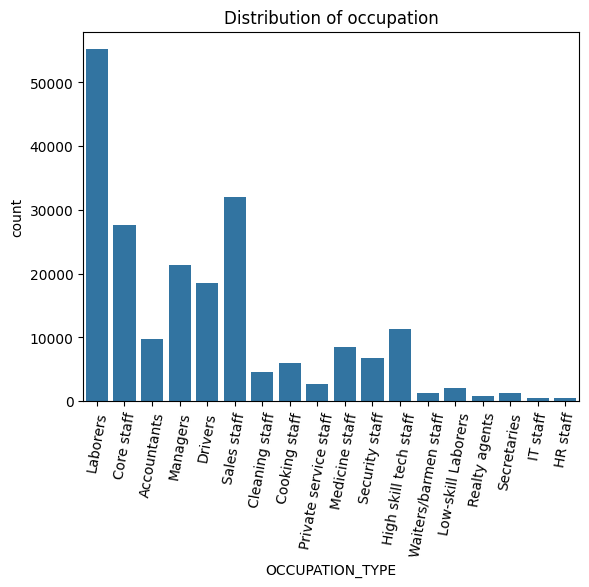

In [271]:
#plotting histogram for 'OCCUPATION_TYPE' column to analyse
sns.countplot(data=app_train,x='OCCUPATION_TYPE')
plt.title('Distribution of occupation')
plt.xticks(rotation=80)
plt.show()

OCCUPATION_TYPE has 31% null values, which can be imputed with a occupation category 'Others'



In [272]:
app_train.OCCUPATION_TYPE.fillna('Others', inplace = True)
app_train.OCCUPATION_TYPE.value_counts(normalize=True)*100


OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

In [273]:
app_train.OCCUPATION_TYPE.isna().sum()

0

Analysis of AMT_ANNUITY column


In [274]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

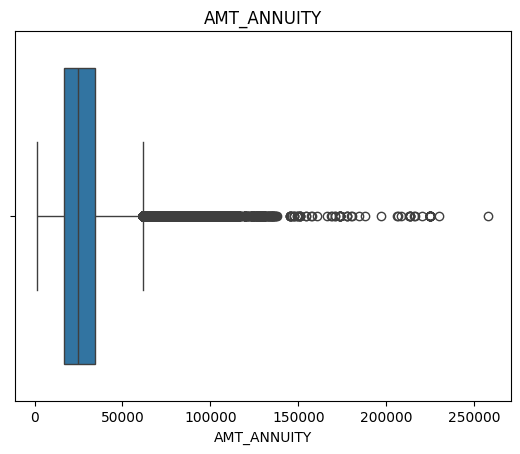

In [275]:
sns.boxplot(x=app_train['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

As we can see here in this coloum there is an outlier so mean is not a good option to fill so we will be filling
it by median  and diffrence is also severe in max and min

In [276]:
# Filling missing values with median
app_train['AMT_ANNUITY'].fillna(app_train['AMT_ANNUITY'].median(),inplace=True)
app_train['AMT_ANNUITY'].isna().sum()

0

####Now we will drop the columns which are not useful


Flag Columns :combining all flag into one single entity as it represents number of documents and not so important for our analysis ,so we drop them.

In [277]:
Doc_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_train.drop(Doc_cols, axis=1, inplace=True)

In [278]:
app_train.shape

(307511, 46)

####Analysing NAME_FAMILY_STATUS column

In [279]:
app_train.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

####Analysis of CNT_FAM_MEMBERS column


In [280]:
app_train['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

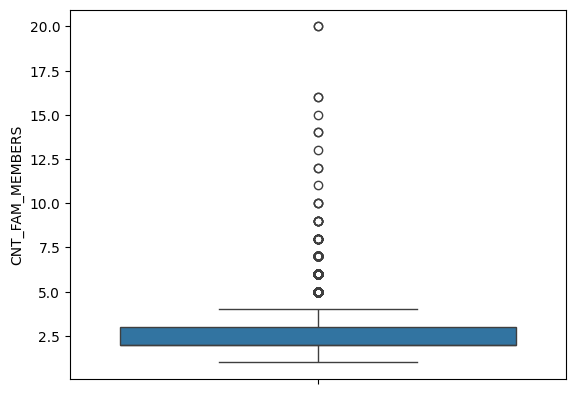

In [281]:
#plotting the values of CNT_FAM_MEMBERS column using box plot to detect outliers
sns.boxplot(y=app_train['CNT_FAM_MEMBERS'])
plt.show()

In [282]:
app_train['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [283]:
# Filling missing values with median
app_train['CNT_FAM_MEMBERS'].fillna(app_train['CNT_FAM_MEMBERS'].median(),inplace=True)
app_train['CNT_FAM_MEMBERS'].isna().sum()

0

In [284]:
app_train.isna().sum().sort_values(ascending=False)

EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
DAYS_LAST_PHONE_CHANGE             1
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
HOUR_APPR_PROCESS_START            0
SK_ID_CURR                         0
TARGET                             0
NAME_INCOME_TYPE                   0
N

####Analysis for AMT_GOODS_PRICE column

In [285]:
app_train['AMT_GOODS_PRICE'].skew()

1.3490003414747445

Since the Data is Positively skewed, Let’s Replace it with median Values

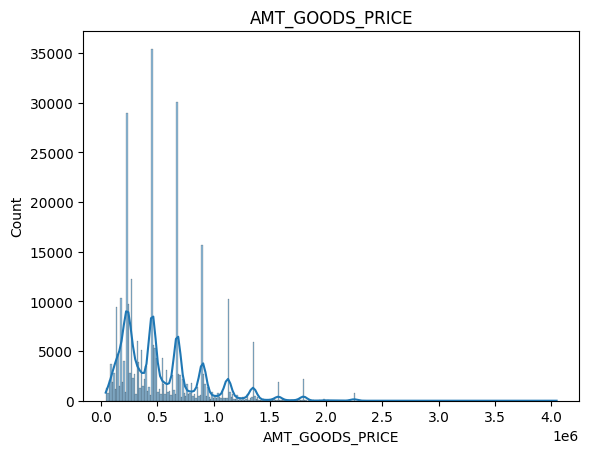

In [286]:
sns.histplot(app_train, x=app_train['AMT_GOODS_PRICE'], kde=True)
plt.title('AMT_GOODS_PRICE')
plt.show()


In [287]:
app_train["AMT_GOODS_PRICE"].fillna(app_train["AMT_GOODS_PRICE"].median(),inplace=True)
app_train['AMT_GOODS_PRICE'].isna().sum()

0

####Analysing NAME_TYPE_SUITE column

In [288]:
app_train["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

It contains categorical values, so replace it with mode.

In [289]:
app_train["NAME_TYPE_SUITE"].fillna(app_train["NAME_TYPE_SUITE"].mode()[0],inplace=True)
app_train["NAME_TYPE_SUITE"].isnull().sum()


0

####Analysing ORGANIZATION_TYPE column

In [290]:
app_train['ORGANIZATION_TYPE'].value_counts().head(15)

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Name: count, dtype: int64

In [291]:
app_train['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [292]:
app_train['ORGANIZATION_TYPE'].fillna('other',inplace=True)
app_train['ORGANIZATION_TYPE'].isna().sum()

0

####Analysing EXT_SOURCE_2 column

```
# This is formatted as code
```



In [293]:
app_train['EXT_SOURCE_2'].isna().sum()

660

In [295]:
app_train['EXT_SOURCE_2'].skew()

-0.7935760449636996

Filling Null values with Median as it negatively skewed and median can be a reasonable choice

In [296]:
app_train["EXT_SOURCE_2"].fillna(app_train["EXT_SOURCE_2"].median(),inplace=True)
app_train["EXT_SOURCE_2"].isnull().sum()


0

####Analysing EXT_SOURCE_3 column


In [298]:
app_train['EXT_SOURCE_3'].skew()

-0.4093904596160267

**As a general rule of thumb:**

>If skewness is less than -1 or greater than 1, the distribution is highly skewed.

>If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

>If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [299]:
app_train["EXT_SOURCE_3"].fillna(app_train["EXT_SOURCE_3"].median(),inplace=True)
app_train["EXT_SOURCE_3"].isnull().sum()


0

####Analysing AMT_REQ_CREDIT_BUREAU_QRT column

In [300]:
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].nunique()

11

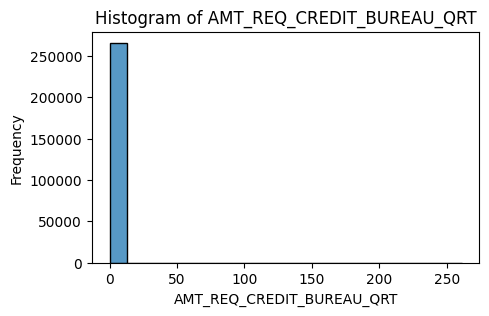

In [301]:
# Plot histogram
plt.figure(figsize=(5,3))
sns.histplot(data=app_train, x='AMT_REQ_CREDIT_BUREAU_QRT')
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_QRT')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_QRT')
plt.ylabel('Frequency')
plt.show()

In [302]:
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

41519

In [303]:
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [304]:
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

####Analysing AMT_REQ_CREDIT_BUREAU_YEAR column

In [305]:
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique()

25

In [306]:
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

41519

In [307]:
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

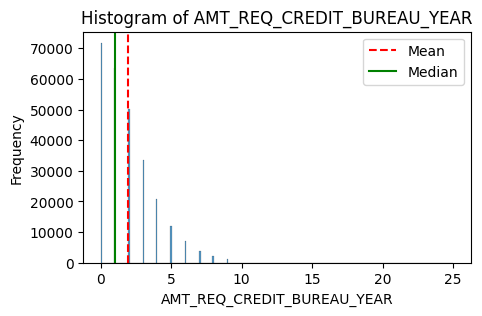

In [308]:
# Plot histogram with mean and median
plt.figure(figsize=(5, 3))
sns.histplot(data=app_train, x='AMT_REQ_CREDIT_BUREAU_YEAR')
plt.axvline(app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), color='green', linestyle='-', label='Median')
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_YEAR')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [309]:
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

####Analysing AMT_REQ_CREDIT_BUREAU_WEEK column

In [310]:
app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].nunique()

9

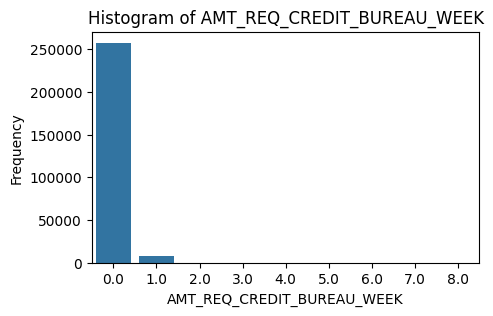

In [311]:
plt.figure(figsize=(5,3))
sns.countplot(data=app_train, x='AMT_REQ_CREDIT_BUREAU_WEEK')
plt.title('Histogram of AMT_REQ_CREDIT_BUREAU_WEEK')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_WEEK')
plt.ylabel('Frequency')
plt.show()


In [312]:
app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

####Analysing remaining columns

In [313]:
cols_to_fill=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON']
# Filling missing values in the specified columns with their respective median
app_train[cols_to_fill]=app_train[cols_to_fill].fillna(app_train[cols_to_fill].median())
app_train[cols_to_fill].isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_MON     0
dtype: int64

In [314]:
app_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION  

######Analysing columns : OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,


In [315]:
app_train['OBS_30_CNT_SOCIAL_CIRCLE'].nunique()

33

In [316]:
app_train['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

In [317]:
app_train['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

In [318]:
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

In [319]:
app_train['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

In [320]:
cols_to_impute = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

app_train[cols_to_impute]=app_train[cols_to_impute].fillna(0)
app_train[cols_to_impute].isna().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

####Analysing CODE_GENDER column

In [321]:
app_train['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

As we can see still there are some null values in form of XNA No we will be converting these value



In [322]:
#As we can see this is Categorical value so we can replace it with mean so we will be replacing it with Mode as F is the highest value
app_train.loc[app_train['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_train['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

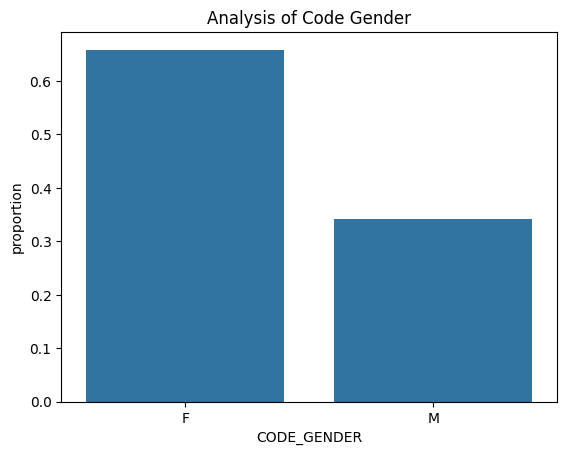

In [323]:
#plotting  the bar graph of CODE_GENDER
sns.barplot(app_train['CODE_GENDER'].value_counts(normalize=True))
plt.title('Analysis of Code Gender')
plt.show()

In [324]:
app_train.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

In [325]:
# Checking the data types of column

app_train.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START  

In [326]:
# Casting all variable into numeric in the dataset
numeric_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

app_train[numeric_cols]=app_train[numeric_cols].apply(pd.to_numeric)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.9,1.7,10.0,5.8,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.1,0.0,0.0,0.0,0.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.9,3.3,3.2,0.8,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.2,0.6,11.7,6.9,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.1,8.3,26.9,6.7,Laborers,2.0,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.7,0.0,0.0,0.0,0.0,0.0,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.6,8.3,11.8,9.5,Core staff,1.0,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000


###Data Imbalance Check:

In [327]:
app_train['TARGET'].shape

(307511,)

In [328]:
target_counts=app_train['TARGET'].value_counts()
target_counts

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [329]:
app_train['TARGET'].isna().sum()

0

In credit risk assessment:
> '1' typically represents customers who are classified as 'high risk' or those who are at a higher risk of getting loan default.

> '0' typically represents customers who are classified as 'low risk' or those who have a lower risk of defaulting.


In [331]:
#Counting the number of records where the value in “Target” col is equal to 0

target0=app_train.loc[app_train["TARGET"]==0]
target0.shape

(282686, 46)

In [332]:
#Counting the number of records where the value in “Target” col is equal to 1

target1=app_train.loc[app_train["TARGET"]==1]
target1.shape

(24825, 46)

In [333]:
# So the value of defaulter(target=0) is less as compared to who are paying loan (target=1)

len(target0)/len(target1)


11.387150050352467

Imbalance Ratio with respect to Repayer(0) and Defaulter(1) is given: 11.38%


####checking columns having data type 'object'


In [344]:
#checking columns having data type 'object'
cat_cols=app_train.select_dtypes(include='O')
cat_cols.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

####checking columns having data type other than 'object'

In [345]:
num_cols=app_train.select_dtypes(exclude='O')
num_cols.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'EMPLOYMENT_BINS',
       'INCOME_GROUP', 'AMT_CREDIT_GROUP', 'AMT_GOODS_PRICE_BIN'],
      dtype='object')

In [346]:
def plotting(application_train, target0, target1, column):
 """
 plt.showPlots three types of visualizations for a given column in the dataset:
 a pie chart of overall distribution, a countplot by category, and a bar plot of percentage distribution by target variable.

 Parameters:
 - app_train: DataFrame containing the entire dataset.
 - target0: DataFrame filtered by the target variable with value 0.
 - target1: DataFrame filtered by the target variable with value 1.
 - column: The name of the column to be visualized.
 """



 # Initialize figure with a specific size
 fig = plt.figure(figsize=(13,10))

 # Create a subplot for the pie chart
 ax1 = plt.subplot(221)
 app_train[column].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1)
 plt.title('Plotting data for the column: ' + column)

 # Create a subplot for the countplot
 ax2 = plt.subplot(222)
 # Plotting count plot by category with hue as TARGET
 sns.countplot(x=column, hue='TARGET', data=app_train, ax=ax2)
 plt.xticks(rotation=90)
 plt.title('Plotting data for target in terms of total count')

 # Create a subplot for the bar plot
 ax3 = plt.subplot(223)
 # Preparing data for percentage distribution by target variable
 df = pd.DataFrame()
 df['0'] = ((target0[column].value_counts())/len(target0))
 df['1'] = ((target1[column].value_counts())/len(target1))
 # Plotting bar plot for percentage distribution
 df.plot.bar(ax=ax3)
 plt.title('Plotting data for target in terms of percentage')

 # Adjust layout to prevent overlap
 fig.tight_layout()
 # Display the plots
 plt.show()

##Univariate Analysis of the Categorical data

Plotting NAME_CONTRACT_TYPE


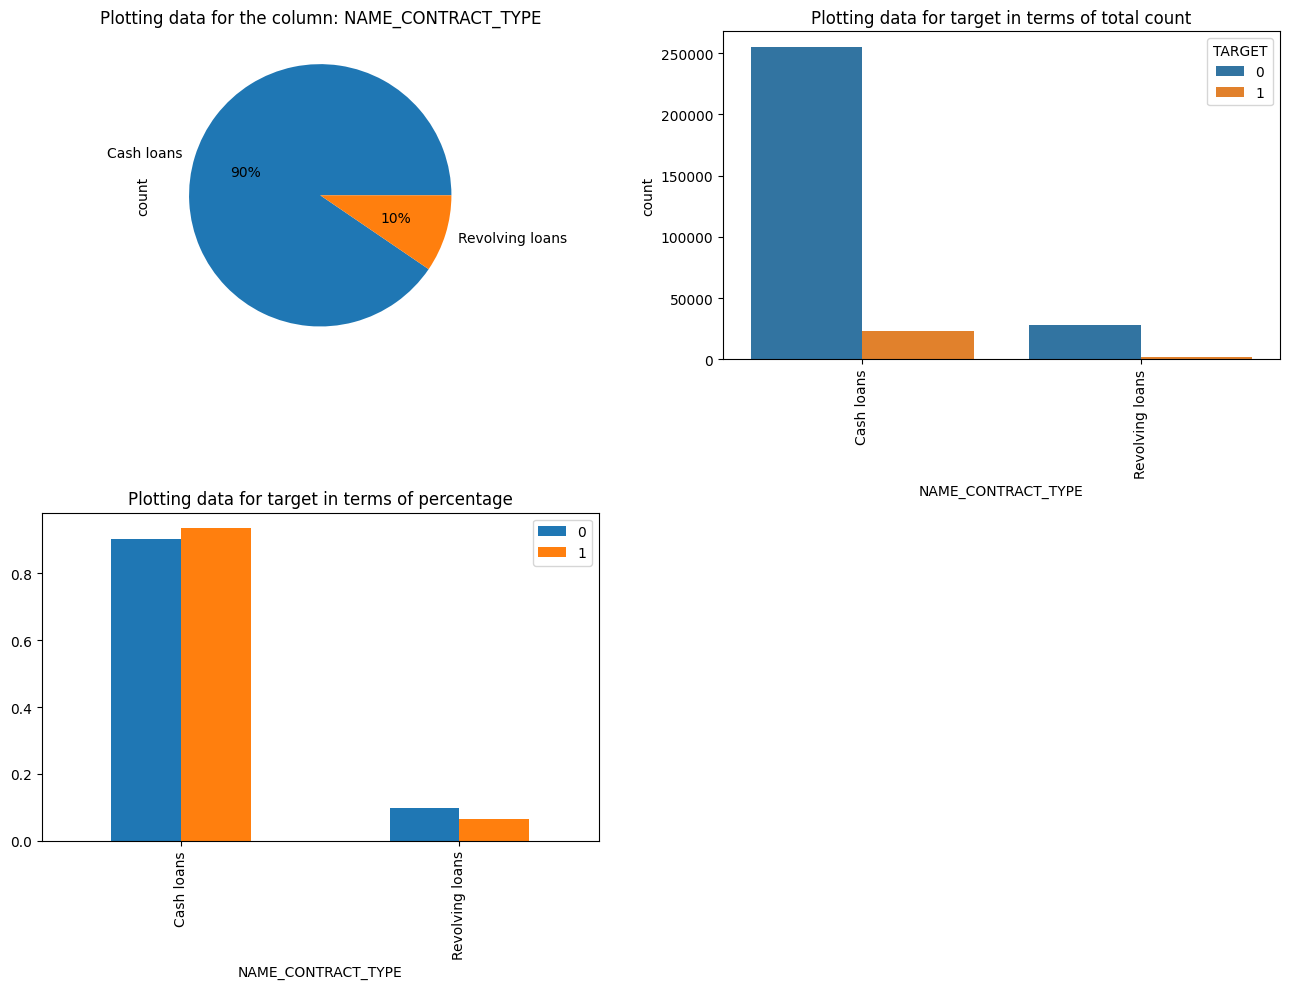

-------------------------------------------------------------------
Plotting CODE_GENDER


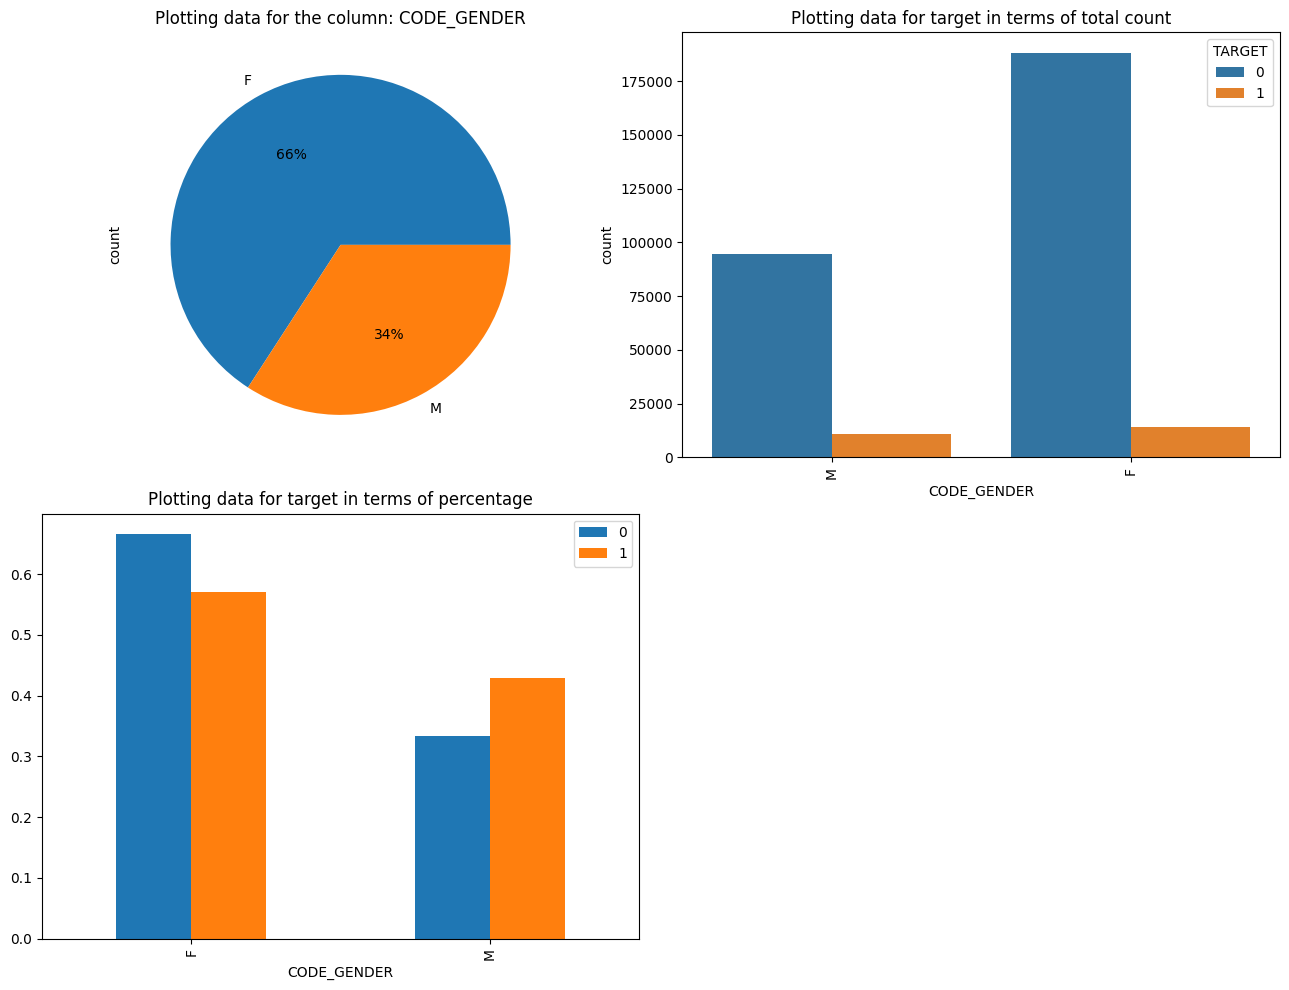

-------------------------------------------------------------------
Plotting FLAG_OWN_CAR


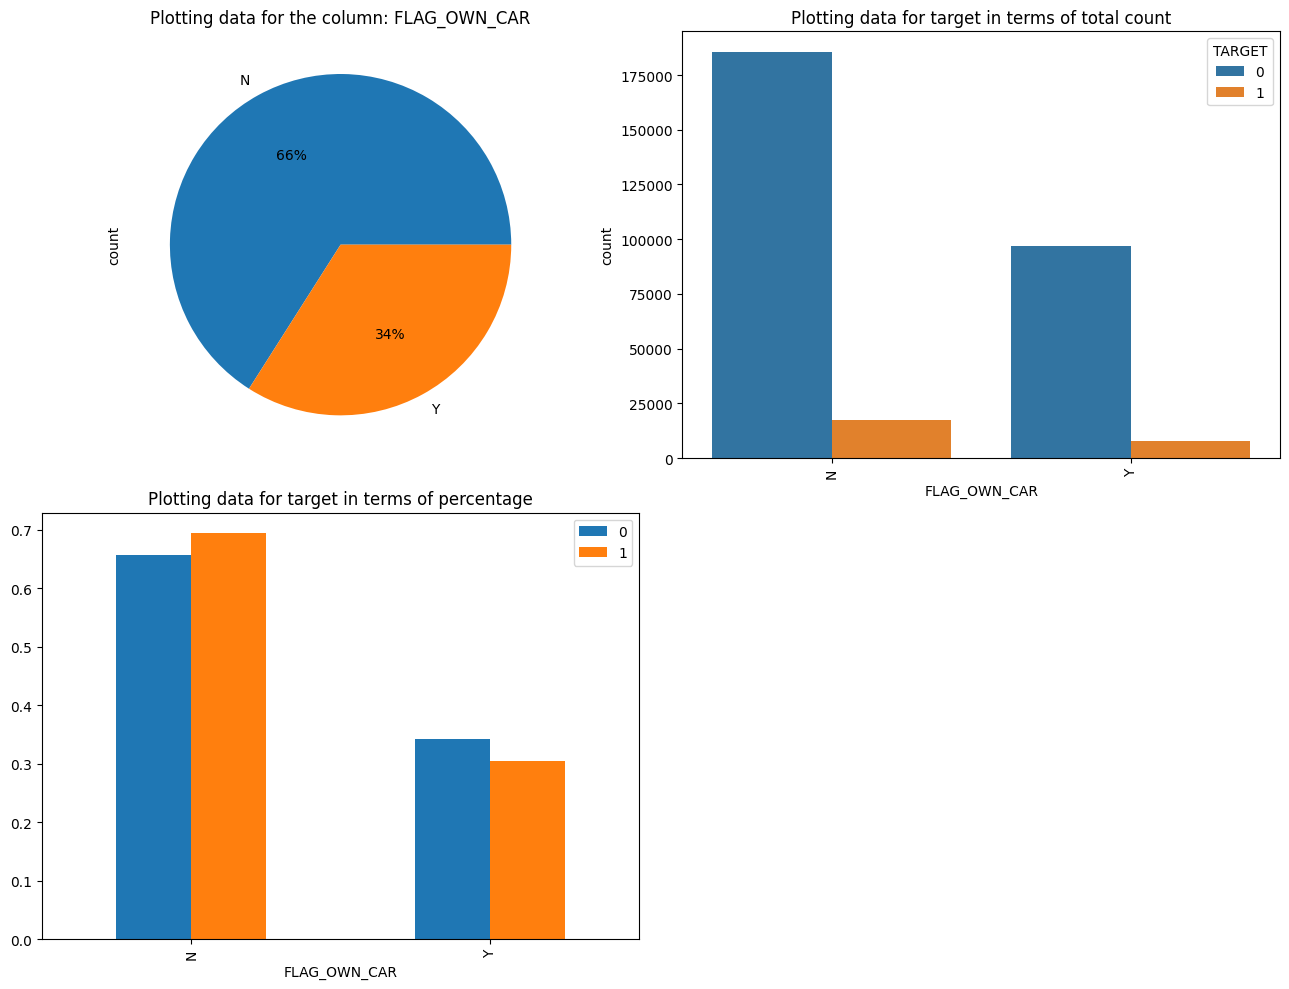

-------------------------------------------------------------------
Plotting FLAG_OWN_REALTY


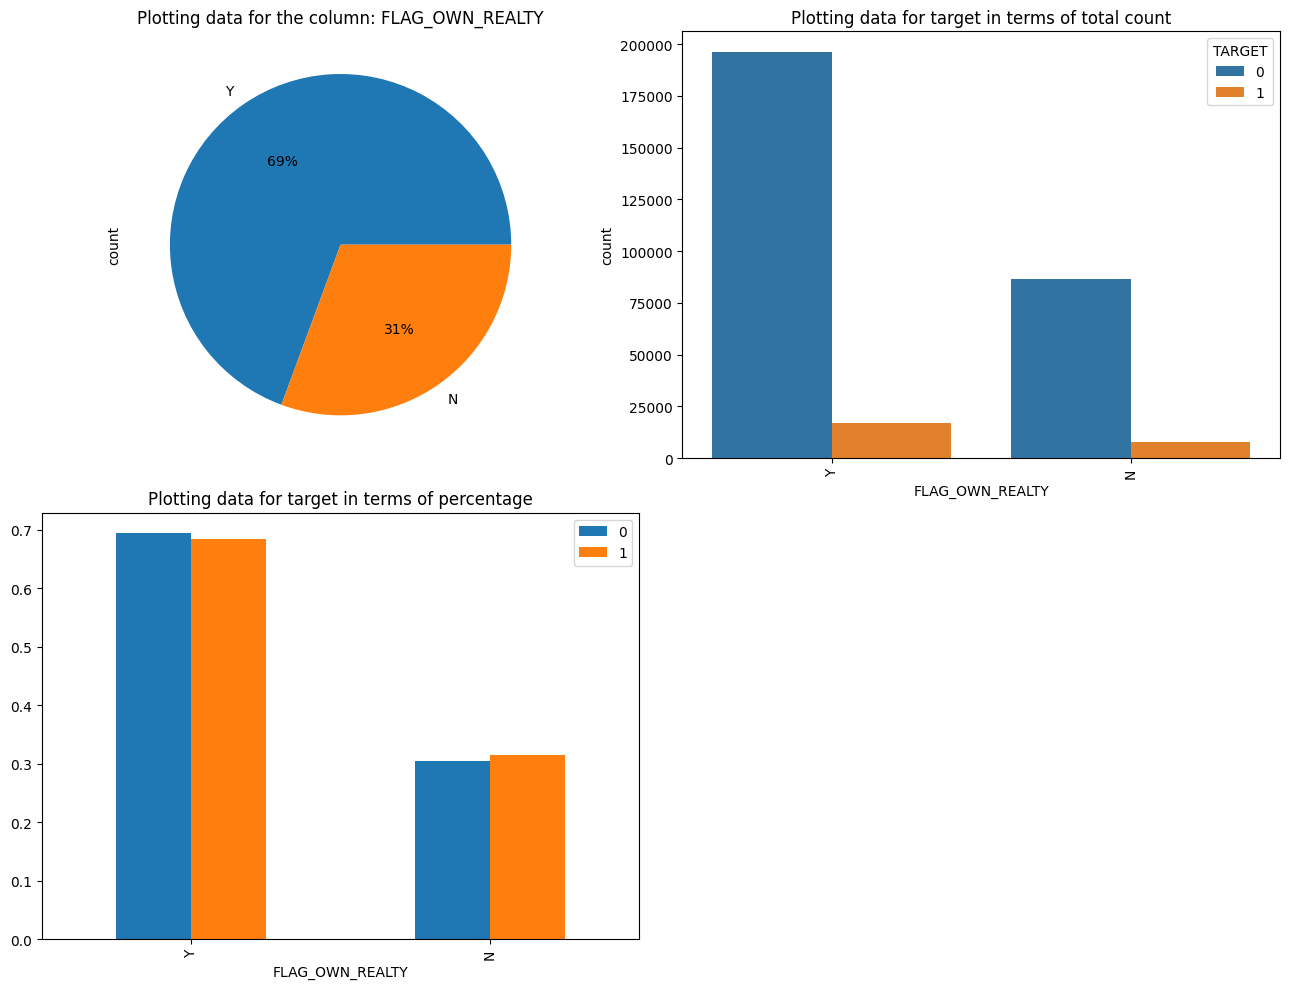

-------------------------------------------------------------------
Plotting NAME_TYPE_SUITE


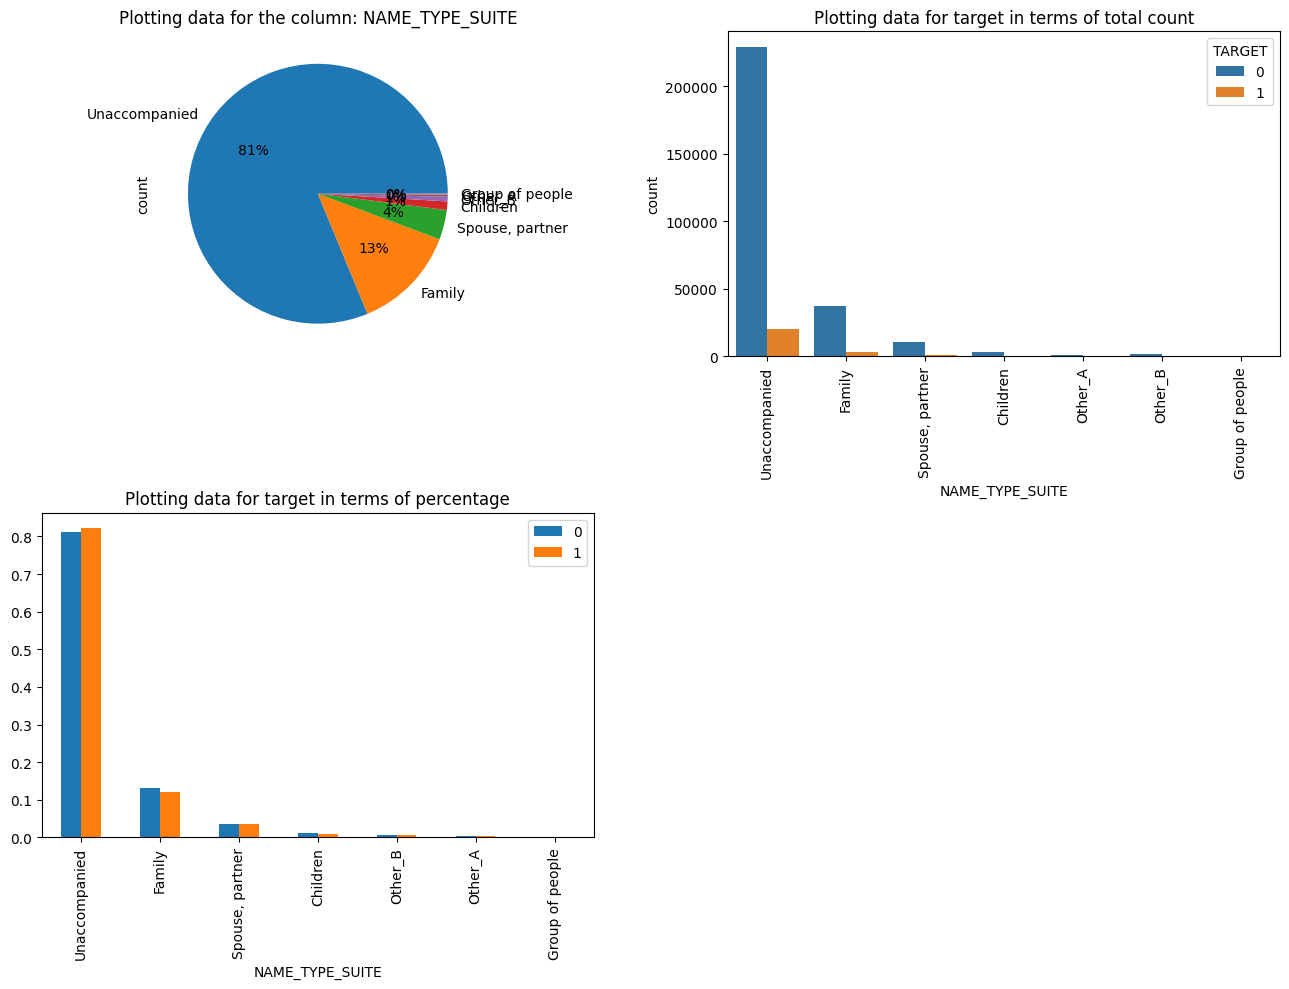

-------------------------------------------------------------------
Plotting NAME_INCOME_TYPE


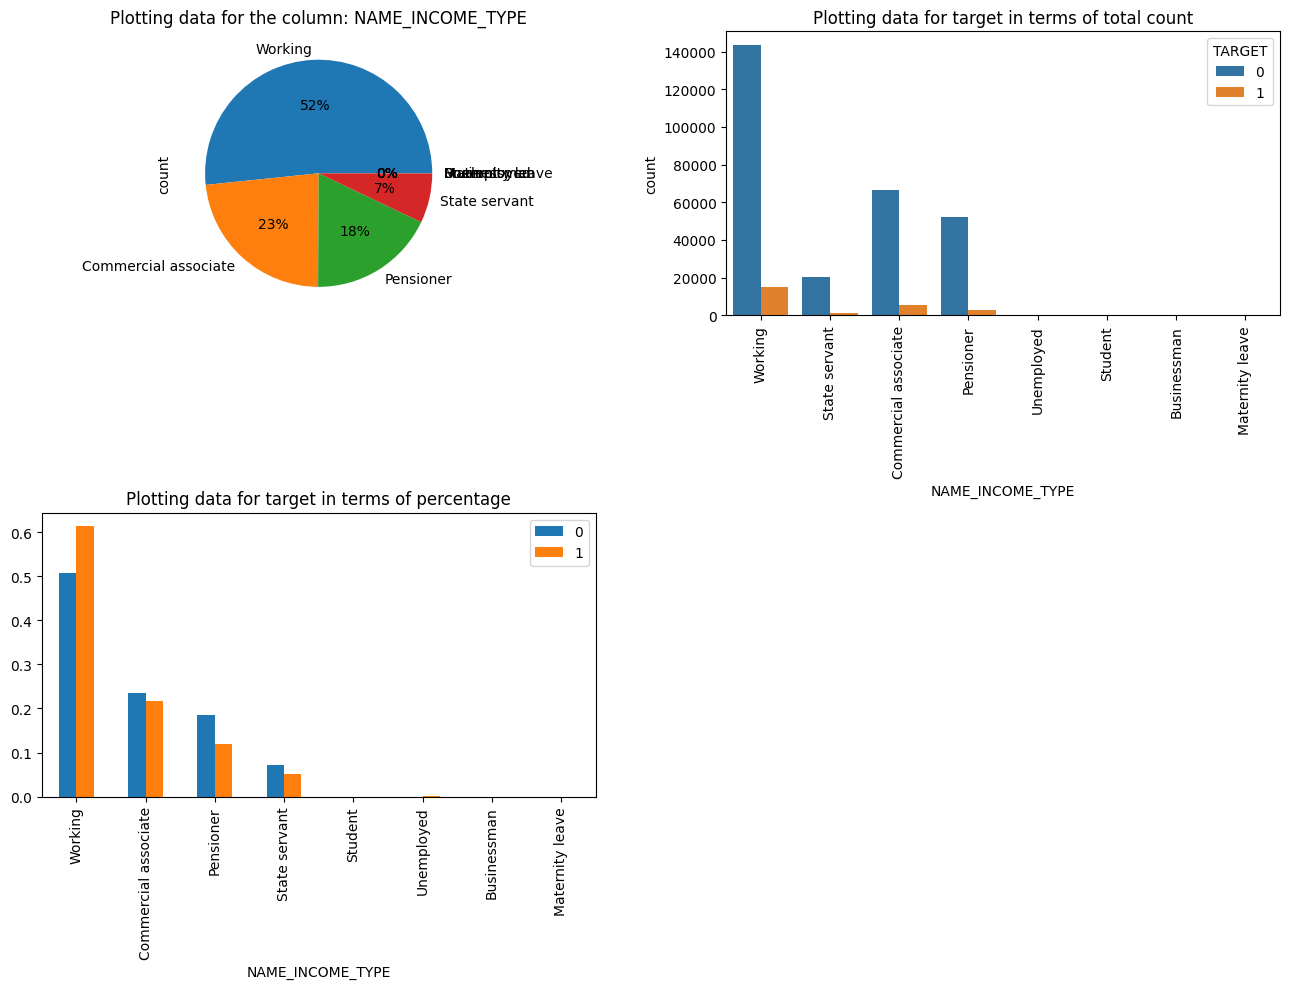

-------------------------------------------------------------------
Plotting NAME_EDUCATION_TYPE


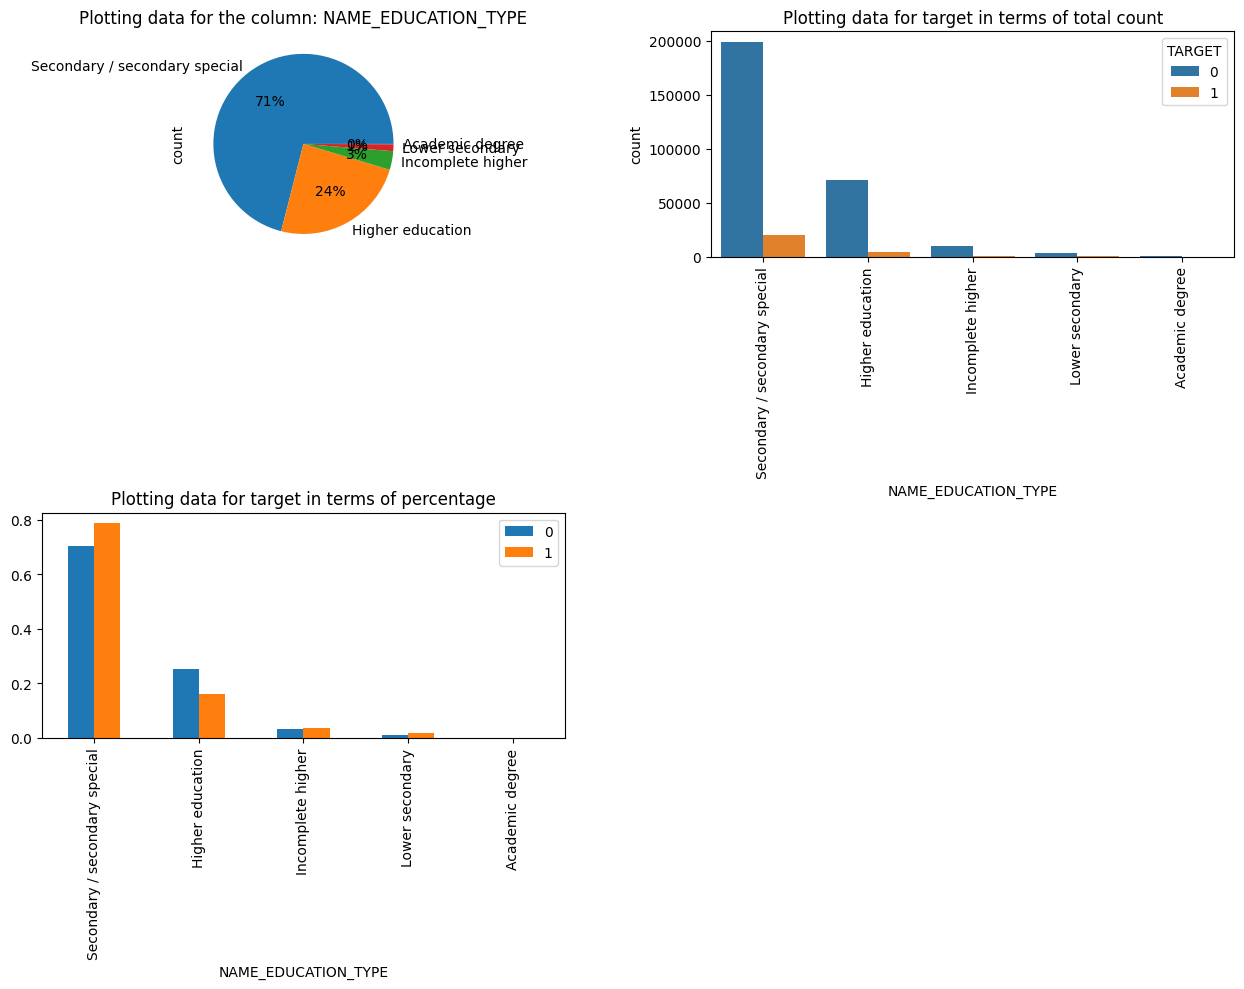

-------------------------------------------------------------------
Plotting NAME_FAMILY_STATUS


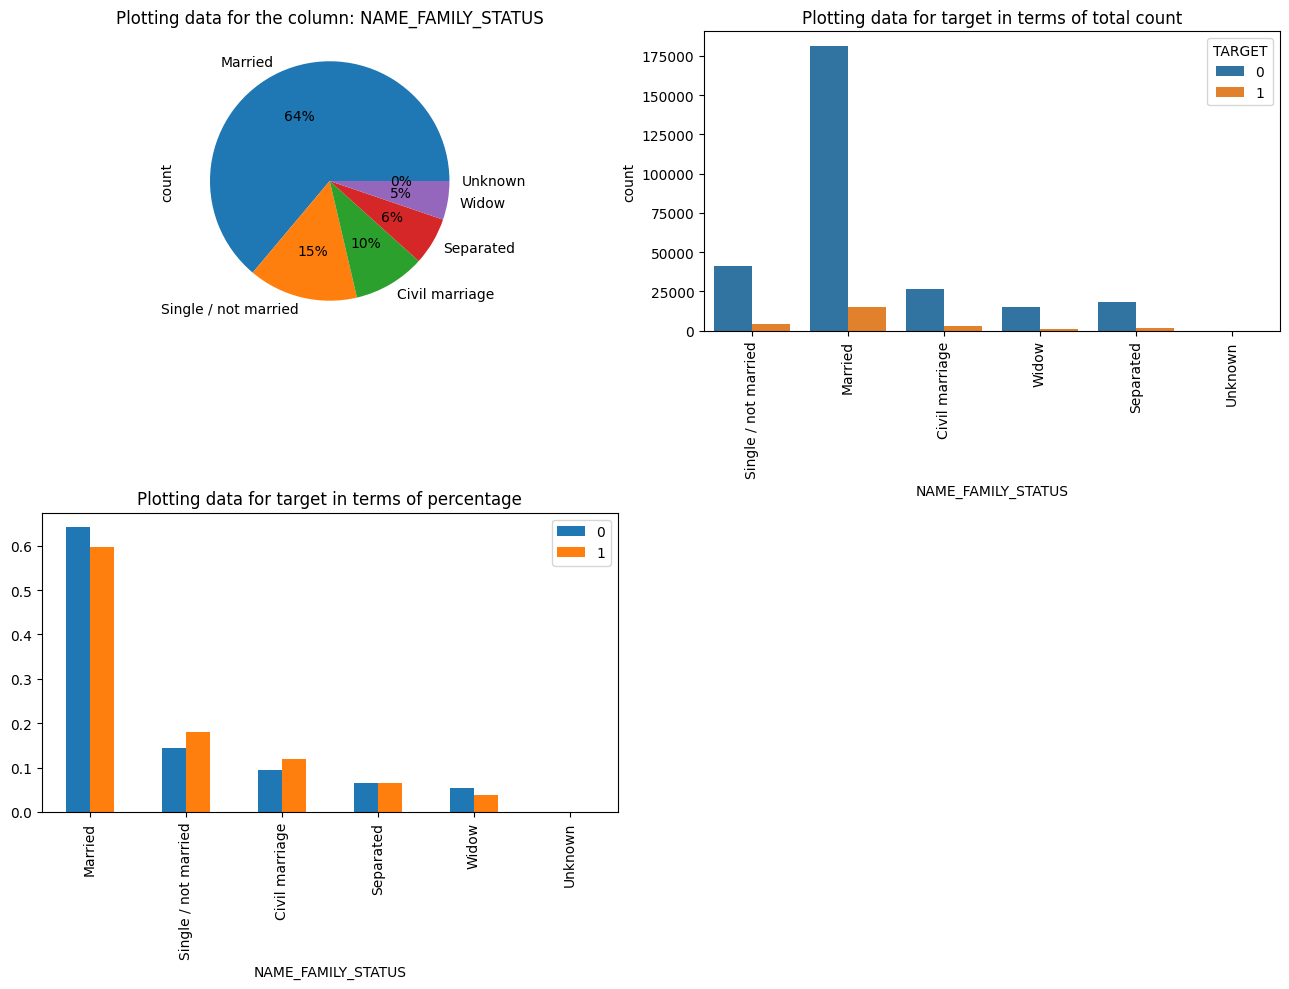

-------------------------------------------------------------------
Plotting NAME_HOUSING_TYPE


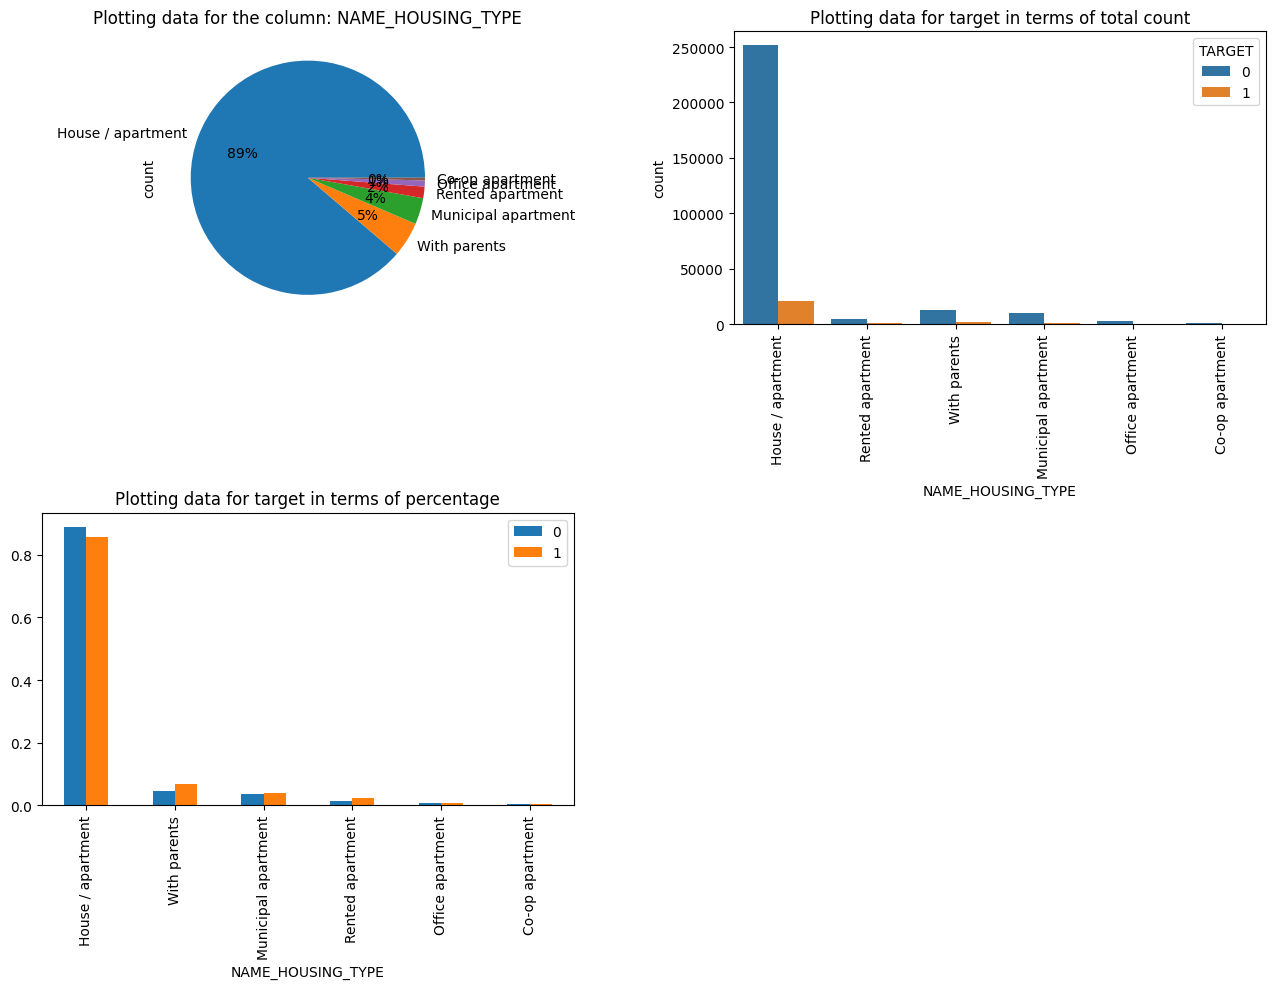

-------------------------------------------------------------------
Plotting OCCUPATION_TYPE


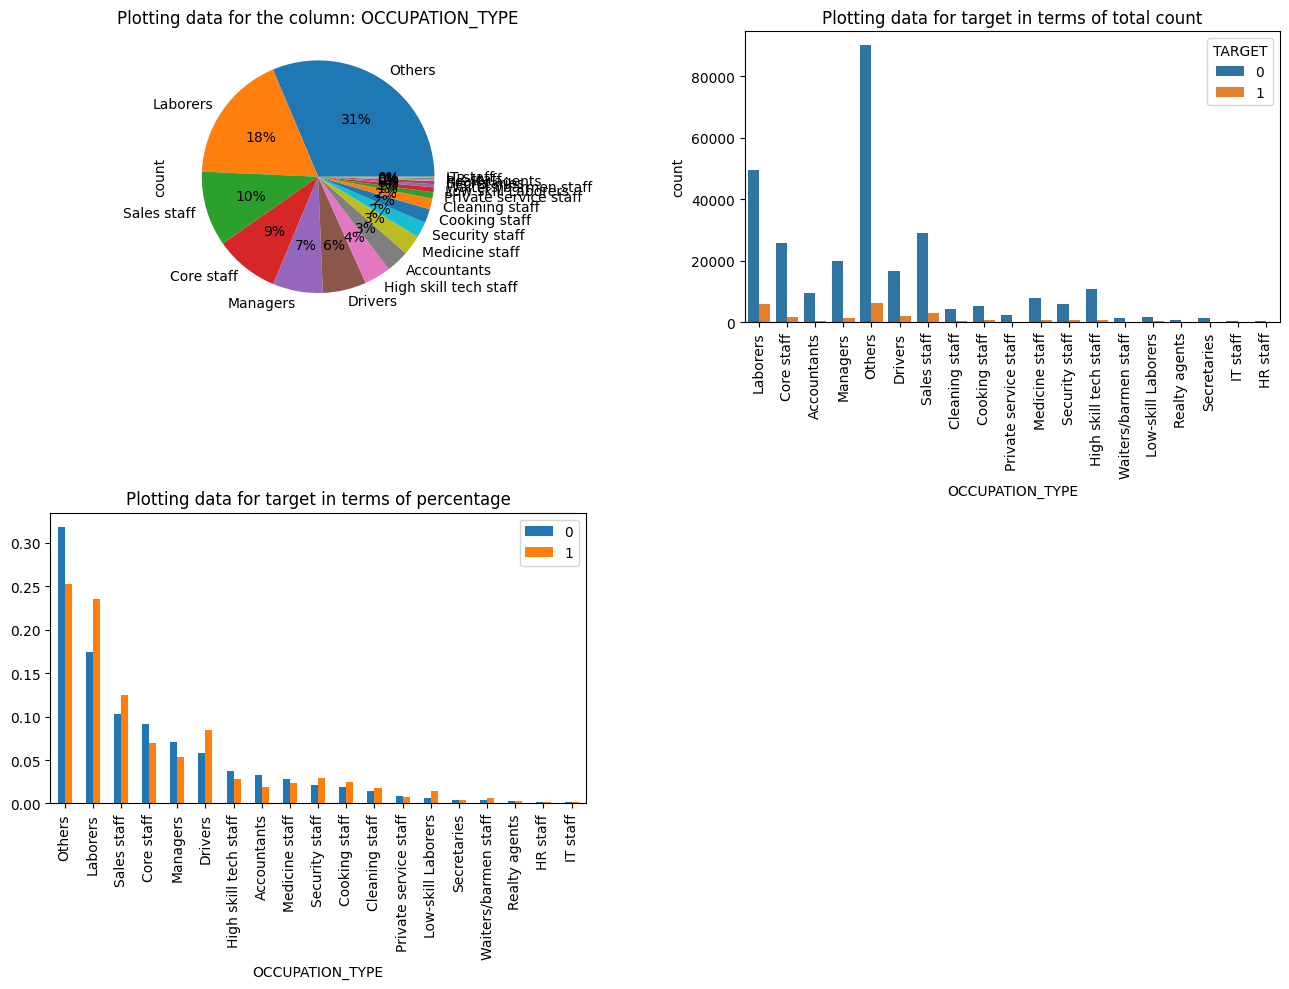

-------------------------------------------------------------------
Plotting WEEKDAY_APPR_PROCESS_START


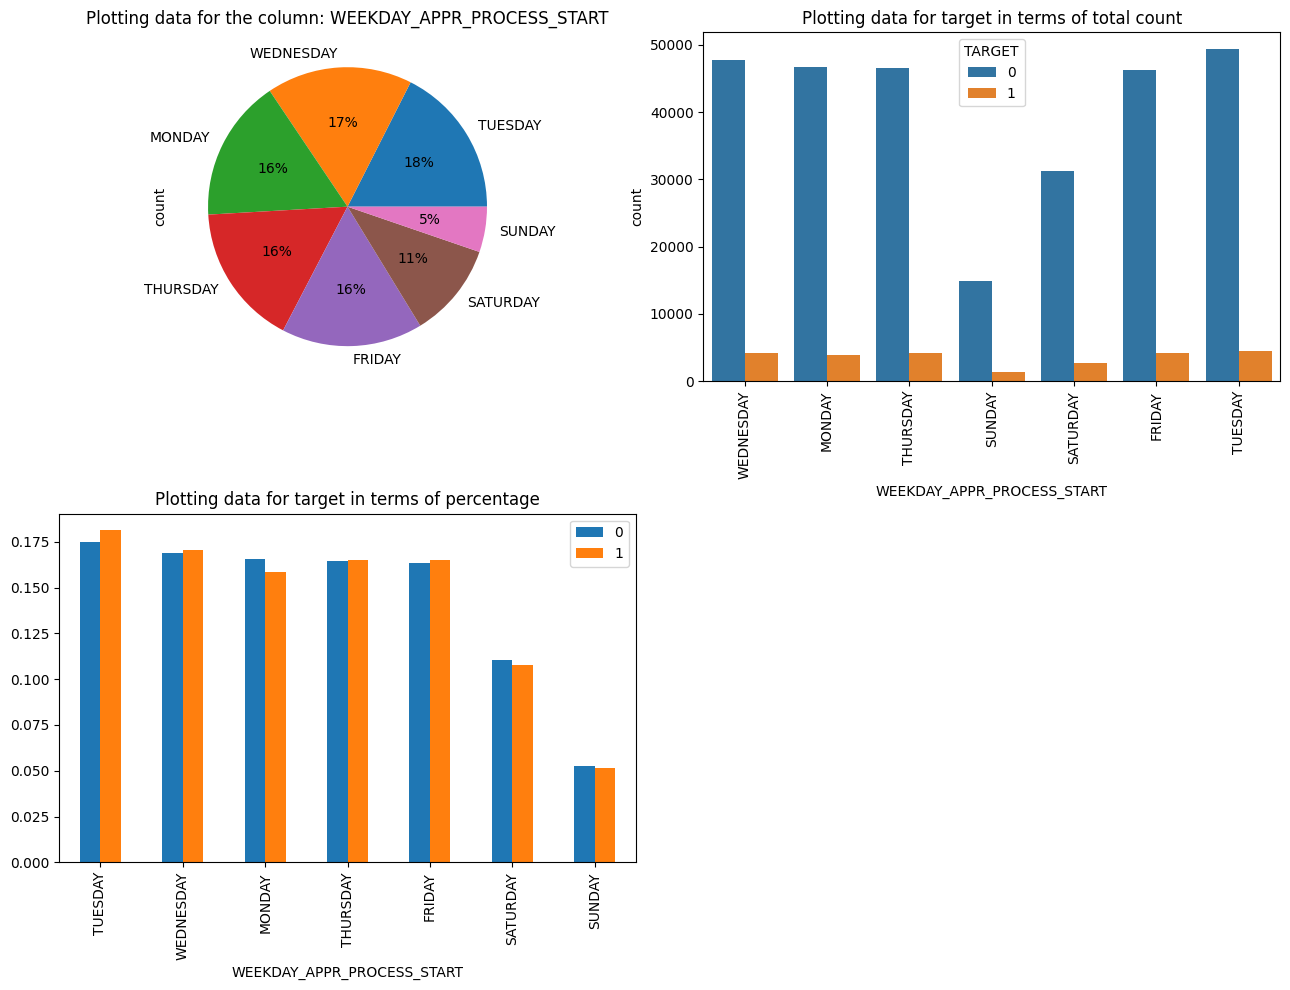

-------------------------------------------------------------------
Plotting ORGANIZATION_TYPE


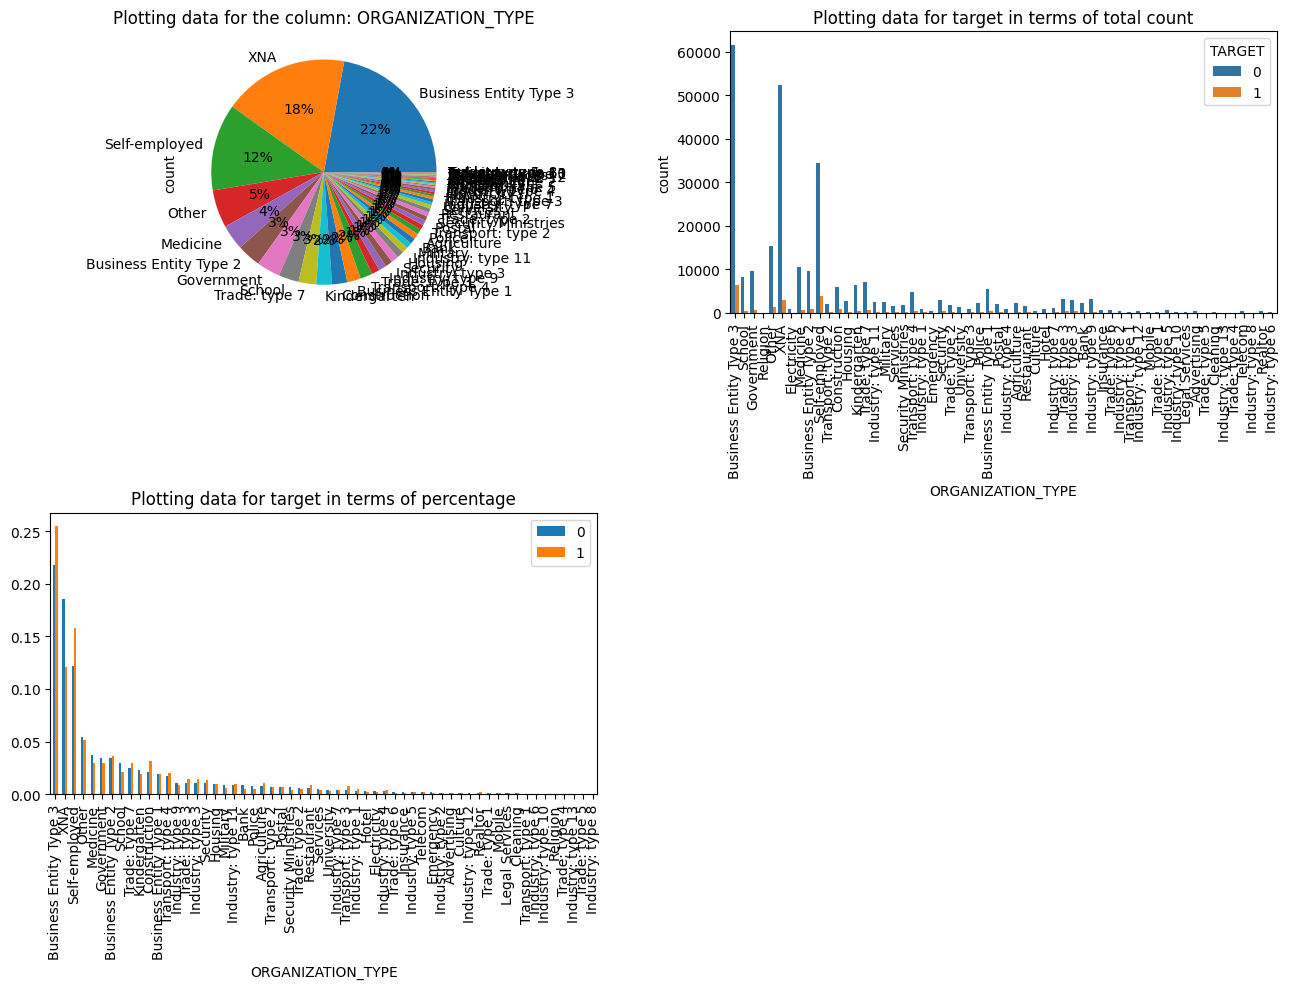

-------------------------------------------------------------------


In [347]:
for column in cat_cols:
  print("Plotting",column)
  plotting(app_train,target0,target1,column)
  print('-------------------------------------------------------------------')

###Analysis of outliers

In [348]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,185.553352,13.660553,8.203265,2.152664,2.052463,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,2.637690,0.005538,0.006055,0.029723,0.231293,0.229631,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,382.050861,9.651947,4.135684,0.910679,0.509034,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,2.265674,0.078014,0.103037,0.190728,0.856810,0.744059,1.738528
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,2.600000,5.500000,4.700000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,6.100000,12.300000,8.900000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.899974
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,15.600000,20.500000,11.800000,3.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,1000.700000,67.600000,19.700000,20.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,11.800000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


####Analyse AMT_INCOME_TOTAL column for outliers


In [349]:
app_train.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

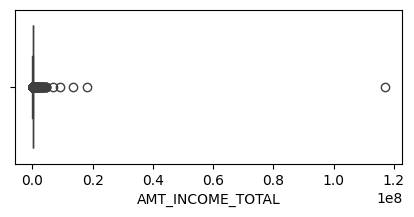

In [350]:
plt.figure(figsize=[5,2])
sns.boxplot(x=app_train.AMT_INCOME_TOTAL)
plt.show()


We can see one entry which is way higher, lets analuze where different quantiles stay.

In [351]:
app_train.AMT_INCOME_TOTAL.quantile([.5, .7, .9, .95, 0.99, 0.999, 0.9999])


0.5000     147150.0
0.7000     180000.0
0.9000     270000.0
0.9500     337500.0
0.9900     472500.0
0.9990     900000.0
0.9999    2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [352]:
# check the values lying outside 0.9999 quantile

app_train[app_train.AMT_INCOME_TOTAL > 0.2*10**8]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,EMPLOYMENT_BINS,INCOME_GROUP,AMT_CREDIT_GROUP,AMT_GOODS_PRICE_BIN
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,2.5,18.5,10.0,Laborers,3.0,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30-40,2-5 years,225k to 117M,513.5k-808.65k,450k-680k


In INCOME, there are outliers, but most of them, execpt one, are continuous and we can retain them, since INCOME is normally spread. But there is one single value which is way too high, and the loan applied is a normal amount, so it can be dropped..



In [353]:
app_train = app_train[~(app_train.AMT_INCOME_TOTAL > 0.2*10**8)]
app_train.shape


(307510, 50)

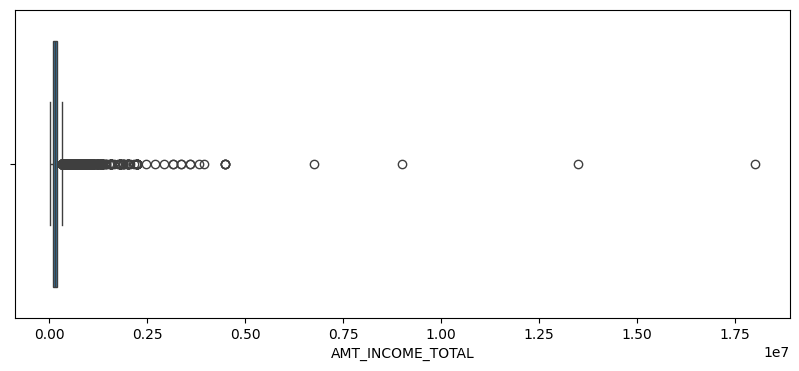

In [354]:
# check the INCOME again

plt.figure(figsize=[10,4])
sns.boxplot(x=app_train.AMT_INCOME_TOTAL)
plt.show()


There are still many outliers in the Income variable. But these values are meaningful as it is spread more or less evenly, and we can keep those.



####Analyse AMT_CREDIT column for outliers



In [355]:
app_train.AMT_CREDIT.describe()


count    3.075100e+05
mean     5.990261e+05
std      4.024914e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

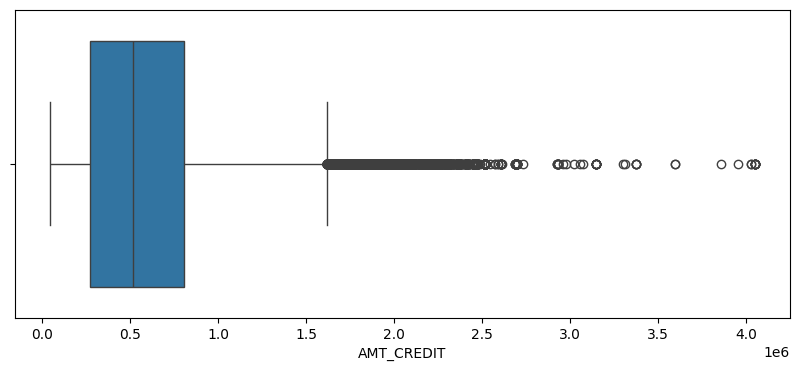

In [356]:
plt.figure(figsize=[10,4])
sns.boxplot(x=app_train.AMT_CREDIT)
plt.show()


In [357]:
app_train.AMT_CREDIT.quantile([.5, .7, .9, .95, 0.99])


0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [358]:
 #Check rows which lies above the 99th percentile

app_train[app_train.AMT_CREDIT > 1854000]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,EMPLOYMENT_BINS,INCOME_GROUP,AMT_CREDIT_GROUP,AMT_GOODS_PRICE_BIN
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,4.1,0.2,7.7,Core staff,3.0,1,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.693358,0.535276,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,3.000000,30-40,2-5 years,225k to 117M,2M-2.5M,2M-4.05M
337,100389,0,Cash loans,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006207,1.0,8.7,12.1,Core staff,2.0,2,WEDNESDAY,14,0,0,0,0,0,0,Self-employed,0.748204,0.739412,0.0,0.0,0.0,0.0,6.6,0.0,0.0,0.0,0.0,0.0,1.000000,30-40,NaN,225k to 117M,1.6M-2M,1.6M-2M
341,100393,0,Cash loans,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.007114,16.9,2.6,13.6,Core staff,4.0,2,FRIDAY,13,0,0,0,0,0,0,Police,0.682320,0.692559,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,1.000000,40-50,13-19 years,225k to 117M,2M-2.5M,2M-4.05M
441,100508,0,Cash loans,F,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.032561,7.0,11.8,4.7,Managers,2.0,1,WEDNESDAY,13,0,0,0,0,0,0,Trade: type 3,0.774368,0.344155,0.0,0.0,0.0,0.0,1.4,0.0,0.0,0.0,0.0,4.0,1.000000,40-50,5-9 years,225k to 117M,1.6M-2M,1.6M-2M
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,38.3,16.1,11.2,Core staff,2.0,2,MONDAY,16,0,0,0,0,0,0,Security Ministries,0.503266,0.535276,1.0,0.0,1.0,0.0,7.3,0.0,0.0,0.0,0.0,0.0,1.899974,50-60,32+ years,225k to 117M,2M-2.5M,2M-4.05M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,1755000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.072508,10.0,15.5,9.3,Medicine staff,2.0,1,TUESDAY,13,0,0,0,0,0,0,Medicine,0.747726,0.624615,1.0,0.0,1.0,0.0,5.1,0.0,0.0,0.0,0.0,0.0,5.000000,50-60,9-13 years,75k to 112.5k,2M-2.5M,1.6M-2M
307095,455785,0,Cash loans,F,Y,Y,0,135000.0,2013840.0,53253.0,1800000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.031329,1000.7,16.3,4.5,Others,2.0,2,FRIDAY,9,0,0,0,0,0,0,XNA,0.212177,0.746300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.000000,50-60,NaN,112.5k to 135k,2M-2.5M,1.6M-2M
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,1890000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,10.0,3.0,3.0,Accountants,2.0,1,TUESDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.688314,0.535276,14.0,1.0,14.0,1.0,1.9,0.0,0.0,0.0,0.0,1.0,4.000000,20-30,9-13 years,225k to 117M,1.6M-2M,1.6M-2M
307214,455922,0,Cash loans,M,Y,N,2,256500.0,2290743.0,60556.5,2047500.0,"Spouse, partner",Commercial associate,Incomplete higher,Married,House / apart

Some applications are asking more relatively higer credits, but nothing way out of the line here. We can observe many of them have GOODS price also very close to the credit, so it justifies and the rows can be kept like that.



####Analyse AMT_GOODS_PRICE column for outliers



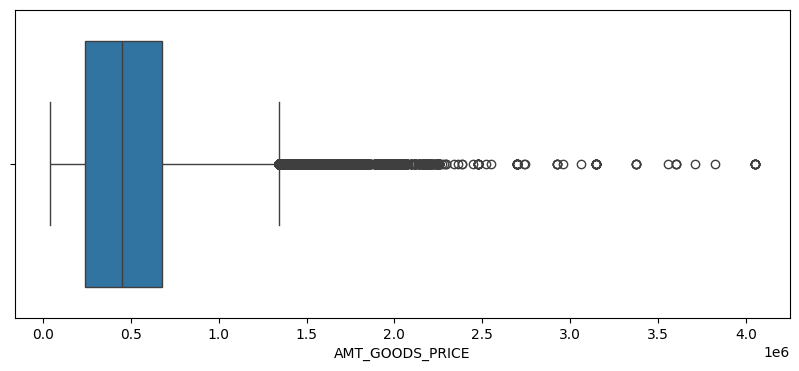

In [359]:
plt.figure(figsize=[10,4])
sns.boxplot(x=app_train.AMT_GOODS_PRICE)
plt.show()


Its very close to the credit distribution which is in real life the case and hence can be left as it is.



>Converting a numerical data to categorical for analysis


<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

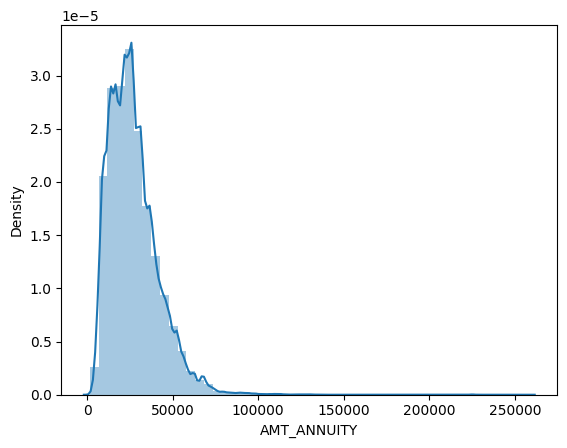

In [360]:
sns.distplot(app_train["AMT_ANNUITY"].dropna())


In [361]:
def amt_annuity(x):
  if x < 20000:
    return 'low'
  elif 20000 < x < 50000:
    return 'medium'
  elif x>50000 and x<=100000:
    return 'High'
  else:
    return 'Very High'

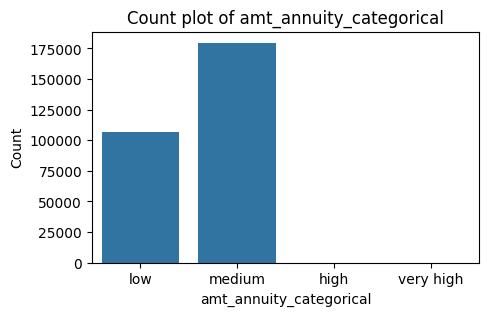

In [362]:
# Apply the function to create a new categorical column
app_train['amt_annuity_categorical'] = app_train['AMT_ANNUITY'].apply(amt_annuity)

# Plot count plot of the new categorical column
plt.figure(figsize=(5, 3))
sns.countplot(x='amt_annuity_categorical', data=app_train, order=['low', 'medium', 'high', 'very high'])
plt.title('Count plot of amt_annuity_categorical')
plt.xlabel('amt_annuity_categorical')
plt.ylabel('Count')
plt.show()


####>Univariate analysis of numerical data


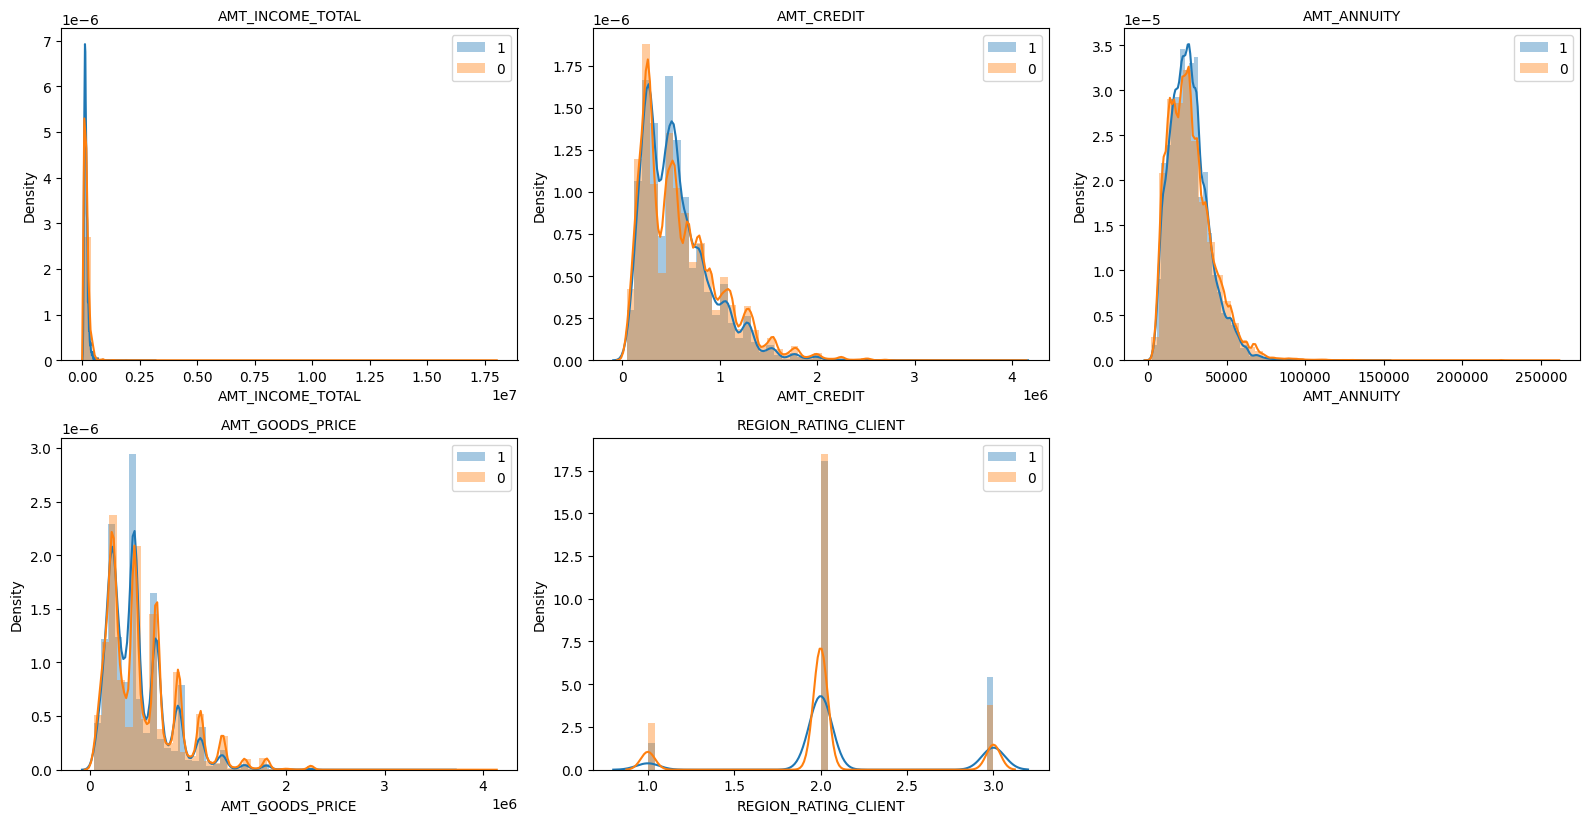

In [447]:
def plot_bivariate_distributions(app_train, columns, target_column):
    fig = plt.figure(figsize=(16, 12))
    for i, column in enumerate(columns):
        plt.subplot(3,3, i + 1)
        sns.distplot(app_train[app_train[target_column] == 1][column],kde=True,  label="1")
        sns.distplot(app_train[app_train[target_column] == 0][column], kde=True, label="0")
        plt.title(column, fontdict={'fontsize': 10, 'fontweight': 3})
        plt.legend()
        plt.tight_layout()
    plt.show()


selected_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_RATING_CLIENT']
plot_bivariate_distributions(app_train, selected_columns, 'TARGET')


**Conclusion**
The distributions of repayers and defaulters overlap in all the plots.
It is challenging to make a decision based on these individual variables.
Further analysis and possibly additional variables are needed to assess loan repayment risk effectively.


##Bivariate Analysis:


#### boxplot for columns NAME_EDUCATION_TYPE,AMT_CREDIT,NAME_FAMILY_STATUS

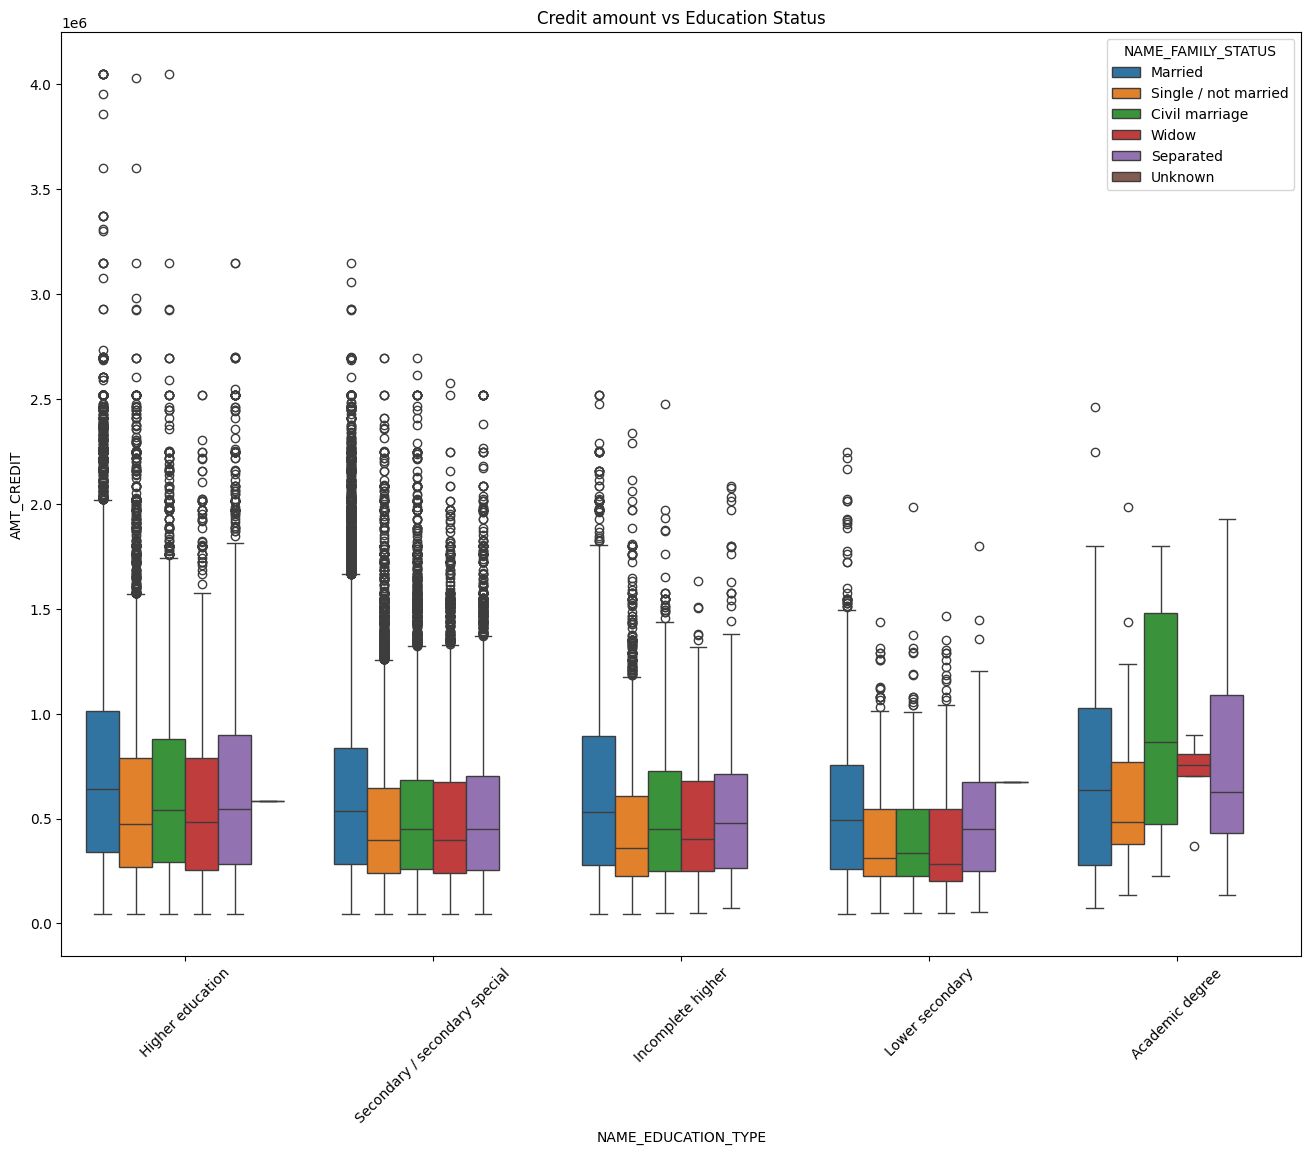

In [366]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =app_train[app_train.TARGET==0], x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount vs Education Status')
plt.show()


**Family Status and Education Analysis**

Clients with family status like 'married' and 'separated' who have achieved an 'Academic degree' education tend to have a higher number of credit applications.

Among clients with 'Higher education', family statuses such as 'marriage','single'  show more outliers in their credit application amounts, indicating greater variation.

clients with 'Civil marriage' status and an 'Academic degree' education primarily fall within the third quartile range, suggesting a preference for higher credit amounts in this group.


##MULTIVARIATE ANALYSIS:


In [368]:
num_cols.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'EMPLOYMENT_BINS',
       'INCOME_GROUP', 'AMT_CREDIT_GROUP', 'AMT_GOODS_PRICE_BIN'],
      dtype='object')

In [369]:
train_0_numeric = target0.select_dtypes(include='number')
corr1=train_0_numeric.corr()


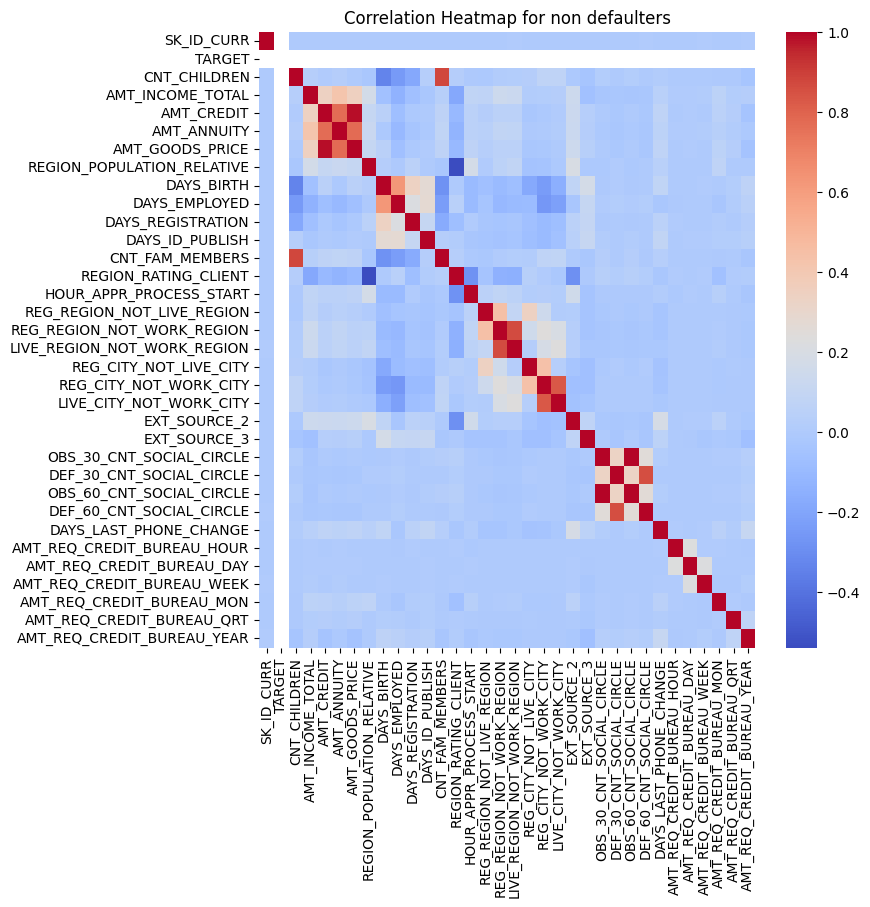

In [370]:
# Plot a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr1, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for non defaulters')
plt.show()


#####Finding the top 10 correlations for non defaulters

In [371]:
# Step 1: Calculate the correlation matrix

correlation_matrix=train_0_numeric.corr().abs()


In [372]:
# Step 2: Unstack the correlation matrix
correlation_series = correlation_matrix.unstack()

In [373]:
# Step 3: Sorting the correlation values in descending order

correlation_sorted = correlation_series.sort_values(ascending=False)
correlation_sorted

SK_ID_CURR                  SK_ID_CURR                1.0
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_LIVE_CITY    1.0
AMT_CREDIT                  AMT_CREDIT                1.0
AMT_ANNUITY                 AMT_ANNUITY               1.0
AMT_GOODS_PRICE             AMT_GOODS_PRICE           1.0
                                                     ... 
AMT_REQ_CREDIT_BUREAU_DAY   TARGET                    NaN
AMT_REQ_CREDIT_BUREAU_WEEK  TARGET                    NaN
AMT_REQ_CREDIT_BUREAU_MON   TARGET                    NaN
AMT_REQ_CREDIT_BUREAU_QRT   TARGET                    NaN
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                    NaN
Length: 1156, dtype: float64

In [374]:
# Step 4: Droping any NaN values

correlation_sorted = correlation_sorted.dropna()
correlation_sorted

SK_ID_CURR                  SK_ID_CURR                    1.000000
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_LIVE_CITY        1.000000
AMT_CREDIT                  AMT_CREDIT                    1.000000
AMT_ANNUITY                 AMT_ANNUITY                   1.000000
AMT_GOODS_PRICE             AMT_GOODS_PRICE               1.000000
                                                            ...   
AMT_REQ_CREDIT_BUREAU_QRT   AMT_REQ_CREDIT_BUREAU_HOUR    0.000037
REG_CITY_NOT_LIVE_CITY      AMT_REQ_CREDIT_BUREAU_HOUR    0.000019
AMT_REQ_CREDIT_BUREAU_HOUR  REG_CITY_NOT_LIVE_CITY        0.000019
DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_DAY     0.000010
AMT_REQ_CREDIT_BUREAU_DAY   DAYS_REGISTRATION             0.000010
Length: 1089, dtype: float64

In [375]:
# Step 5: Printing the top 10 correlations
print(correlation_sorted.head(10))

SK_ID_CURR                  SK_ID_CURR                    1.0
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_LIVE_CITY        1.0
AMT_CREDIT                  AMT_CREDIT                    1.0
AMT_ANNUITY                 AMT_ANNUITY                   1.0
AMT_GOODS_PRICE             AMT_GOODS_PRICE               1.0
REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE    1.0
DAYS_BIRTH                  DAYS_BIRTH                    1.0
DAYS_EMPLOYED               DAYS_EMPLOYED                 1.0
DAYS_REGISTRATION           DAYS_REGISTRATION             1.0
DAYS_ID_PUBLISH             DAYS_ID_PUBLISH               1.0
dtype: float64


###Finding the correlation for TARGET 1 (Defaulters)

In [376]:
train_1_numeric = target1.select_dtypes(include='number')
corr2=train_1_numeric.corr()
corr2.index

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

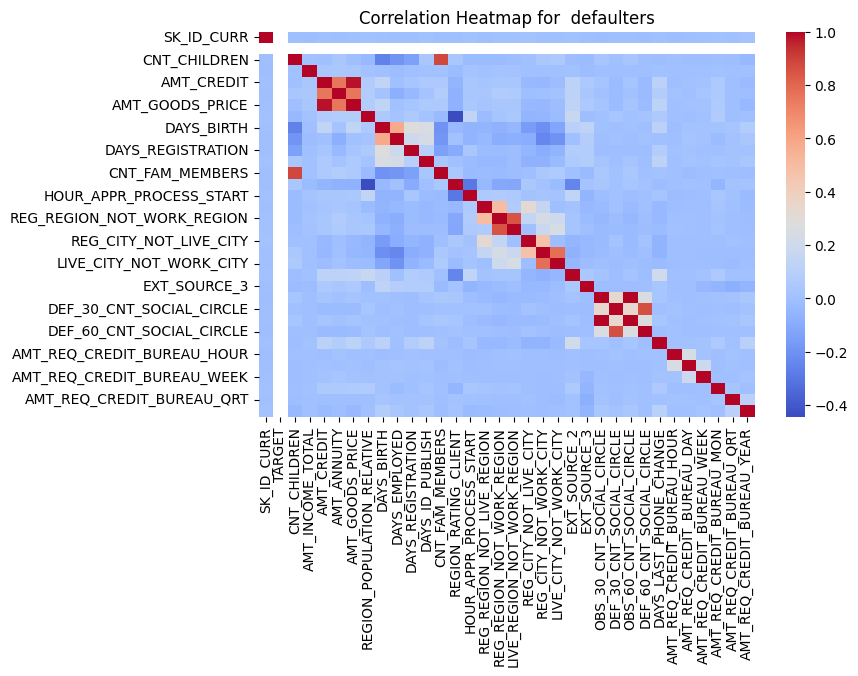

In [377]:
# Plot a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr2, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for  defaulters')
plt.show()


#####Finding the top 10 correlations for defaulters

In [378]:
correlation_matrix = train_1_numeric.corr().abs()
correlation_series = correlation_matrix.unstack()
correlation_sorted = correlation_series.sort_values(ascending=False)
correlation_sorted = correlation_sorted.dropna()
correlation_sorted

SK_ID_CURR                   SK_ID_CURR                     1.000000
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_LIVE_CITY         1.000000
AMT_CREDIT                   AMT_CREDIT                     1.000000
AMT_ANNUITY                  AMT_ANNUITY                    1.000000
AMT_GOODS_PRICE              AMT_GOODS_PRICE                1.000000
                                                              ...   
AMT_REQ_CREDIT_BUREAU_DAY    AMT_ANNUITY                    0.000074
LIVE_REGION_NOT_WORK_REGION  AMT_REQ_CREDIT_BUREAU_DAY      0.000039
AMT_REQ_CREDIT_BUREAU_DAY    LIVE_REGION_NOT_WORK_REGION    0.000039
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
Length: 1089, dtype: float64

In [379]:
print(correlation_sorted.head(10))


SK_ID_CURR                  SK_ID_CURR                    1.0
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_LIVE_CITY        1.0
AMT_CREDIT                  AMT_CREDIT                    1.0
AMT_ANNUITY                 AMT_ANNUITY                   1.0
AMT_GOODS_PRICE             AMT_GOODS_PRICE               1.0
REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE    1.0
DAYS_BIRTH                  DAYS_BIRTH                    1.0
DAYS_EMPLOYED               DAYS_EMPLOYED                 1.0
DAYS_REGISTRATION           DAYS_REGISTRATION             1.0
DAYS_ID_PUBLISH             DAYS_ID_PUBLISH               1.0
dtype: float64


###Reading Previous_application dataset

In [380]:
prev_app=pd.read_csv("/content/drive/MyDrive/cra/previous_application.csv")
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
#shape of previous application
prev_app.shape

(1670214, 37)

In [382]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [383]:
#Number of unique id in previous application
prev_app['SK_ID_PREV'].value_counts()

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: count, Length: 1670214, dtype: int64

In [384]:
prev_app['SK_ID_CURR'].value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: count, Length: 338857, dtype: int64

In [385]:
#finding null value percentage in prev_app
NULL_COL=prev_app.isna().sum()*100/len(prev_app)
NULL_COL[NULL_COL >0]


AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

Dropping columns with more than 40 % Null values


In [386]:
drop_col=prev_app.columns[prev_app.isnull().sum()/prev_app.shape[0]*100 > 40]
prev_app.drop(columns=drop_col,inplace=True)
prev_app.shape


(1670214, 26)

After dropping columns more than 40% null values , remaining columns are:

In [387]:
null_col=prev_app.isnull().sum()/prev_app.shape[0]*100
null_col[null_col> 0]


AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

Dealing with null values of AMT_ANNUITY column:

In [388]:
prev_app.AMT_ANNUITY.value_counts()

AMT_ANNUITY
2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: count, Length: 357959, dtype: int64

In [389]:
prev_app.AMT_ANNUITY.skew()

2.6925715126729455

In [390]:
prev_app[prev_app.AMT_ANNUITY.isnull()].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


When we see above deatils where AMT_ANNUTIY is null we can see the the loan status is either cancelled or refused or unused order. Replacing those values with 0

In [391]:
specified_values = ["Canceled", "Refused", "Unused offer"]
prev_app.loc[prev_app['NAME_CONTRACT_STATUS'].isin(specified_values), 'AMT_ANNUITY'] = 0
prev_app[prev_app.AMT_ANNUITY.isnull()].head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
191373,1655938,203207,Consumer loans,NaN,130050.00,130050.0,130050.00,WEDNESDAY,11,Y,0,XAP,Approved,-559,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,67,Connectivity,14.0,high,POS mobile with interest
251875,2447775,120570,Cash loans,NaN,270000.00,270000.0,270000.00,FRIDAY,16,Y,1,Everyday expenses,Approved,-718,Cash through the bank,XAP,Refreshed,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
287370,1899883,306602,Cash loans,NaN,202500.00,202500.0,202500.00,MONDAY,10,Y,1,Medicine,Approved,-505,Cash through the bank,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
627069,1061824,305827,Consumer loans,NaN,80955.00,92952.0,80955.00,WEDNESDAY,19,Y,0,XAP,Approved,-522,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,20,Connectivity,12.0,high,POS mobile with interest
648826,2320523,352840,Consumer loans,NaN,119812.68,121495.5,119812.68,WEDNESDAY,16,Y,0,XAP,Approved,-537,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,340,Connectivity,12.0,middle,POS mobile with interest


Since the column is positively skewed,we fill the remaining  null values with median .

In [392]:
prev_app.AMT_ANNUITY.fillna(prev_app.AMT_ANNUITY.median(),inplace=True)
prev_app.AMT_ANNUITY.isna().sum()

0

Dealin with null values for column : PRODUCT_COMBINATION


In [393]:
prev_app["PRODUCT_COMBINATION"].value_counts()


PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

it contains categorical data ,so replacing Null with mode

In [394]:
prev_app["PRODUCT_COMBINATION"].fillna(prev_app["PRODUCT_COMBINATION"].mode()[0],inplace=True)
prev_app["PRODUCT_COMBINATION"].isnull().sum()


0

Dealing with Null Values of column: AMT_GOODS_PRICE


In [395]:
prev_app.AMT_GOODS_PRICE.skew()

3.0736896781923937

positively skewed.So filling null values by median.

In [396]:
prev_app.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [397]:
prev_app.AMT_GOODS_PRICE.median()

112320.0

In [398]:
prev_app["AMT_GOODS_PRICE"].fillna(prev_app["AMT_GOODS_PRICE"].median(),inplace=True)
prev_app["AMT_GOODS_PRICE"].isnull().sum()


0

Dealing with Null Values of column: CNT_PAYMENT


In [399]:
prev_app.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [400]:
prev_app.CNT_PAYMENT.skew()

1.5314029823509057

In [401]:
missing_payment = prev_app[prev_app['CNT_PAYMENT'].isnull() | (prev_app['CNT_PAYMENT'] == 0)]

# Examine unique values in NAME_CONTRACT_STATUS
status_counts1 = missing_payment['NAME_CONTRACT_STATUS'].value_counts()
print(status_counts1)


NAME_CONTRACT_STATUS
Canceled        306278
Approved         97775
Refused          87636
Unused offer     25526
Name: count, dtype: int64


In [402]:
prev_app['CNT_PAYMENT'].fillna(0, inplace=True)
prev_app['CNT_PAYMENT'].isna().sum()


0

In [403]:
prev_app.isna().sum()*100/len(prev_app)

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_ANNUITY                    0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
AMT_GOODS_PRICE                0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE                   0.00000
SELLERPLACE_AREA               0.00000
NAME_SELLER_INDUSTRY           0.00000
CNT_PAYMENT                    0.00000
NAME_YIELD_GROUP               0.00000
PRODUCT_COMBINATION      

####Analysis of Previous application

###1: NAME_CONTRACT_STATUS


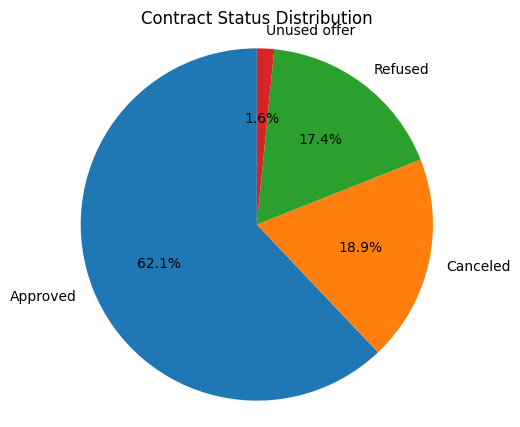

In [404]:
data = prev_app['NAME_CONTRACT_STATUS'].value_counts()

# Create a Pie chart
plt.figure(figsize=(5, 5))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle

plt.axis('equal')
plt.title('Contract Status Distribution')
plt.show()


###2: NAME_CLIENT_TYPE


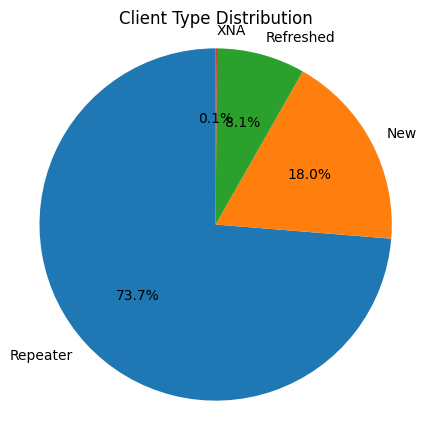

In [405]:
data = prev_app['NAME_CLIENT_TYPE'].value_counts()

# Create a Pie chart
plt.figure(figsize=(5, 5))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Client Type Distribution')
plt.show()

###3:NAME_CONTRACT_TYPE

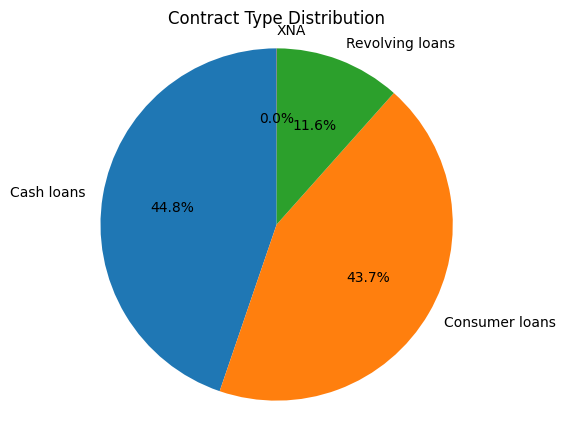

In [406]:
data = prev_app['NAME_CONTRACT_TYPE'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Contract Type Distribution')
plt.show()


##Merging datasets

Selecting an inner join allows us to focus our analysis on applicants who possess both application data and previous application data.

In [411]:
df_final=pd.merge(app_train,prev_app,on="SK_ID_CURR",how="inner")
null_col=df_final.isnull().sum()/df_final.shape[0]*100
null_col[null_col>0]

EMPLOYMENT_BINS        27.495901
INCOME_GROUP            0.000920
AMT_CREDIT_GROUP        0.000071
AMT_GOODS_PRICE_BIN     0.000071
AMT_CREDIT_y            0.000071
dtype: float64

In [408]:
df_final.shape

(1413698, 76)

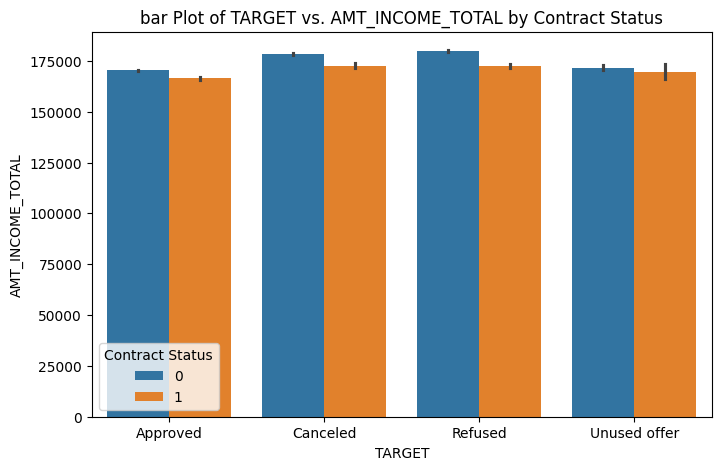

In [448]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_final, x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL", hue="TARGET")

# Customize the plot
plt.title("bar Plot of TARGET vs. AMT_INCOME_TOTAL by Contract Status")
plt.xlabel("TARGET")
plt.ylabel("AMT_INCOME_TOTAL")
plt.legend(title="Contract Status")

# Show the plot
plt.show()


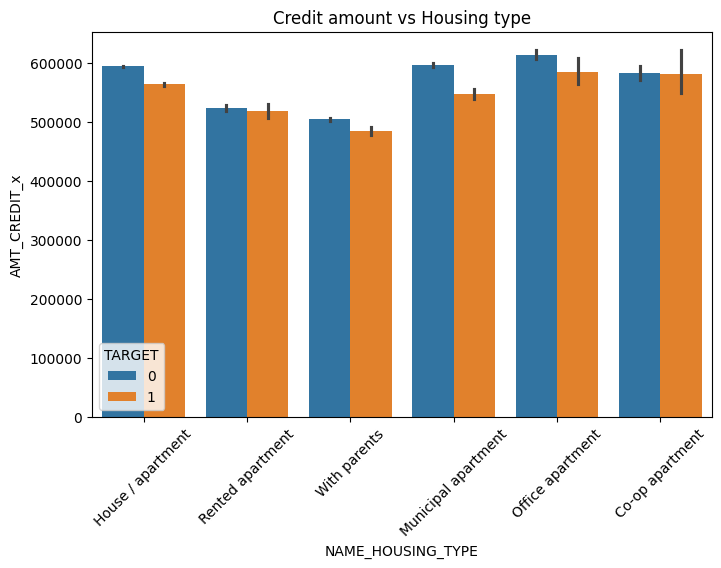

In [418]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
sns.barplot(data =df_final, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Credit amount vs Housing type')
plt.show()

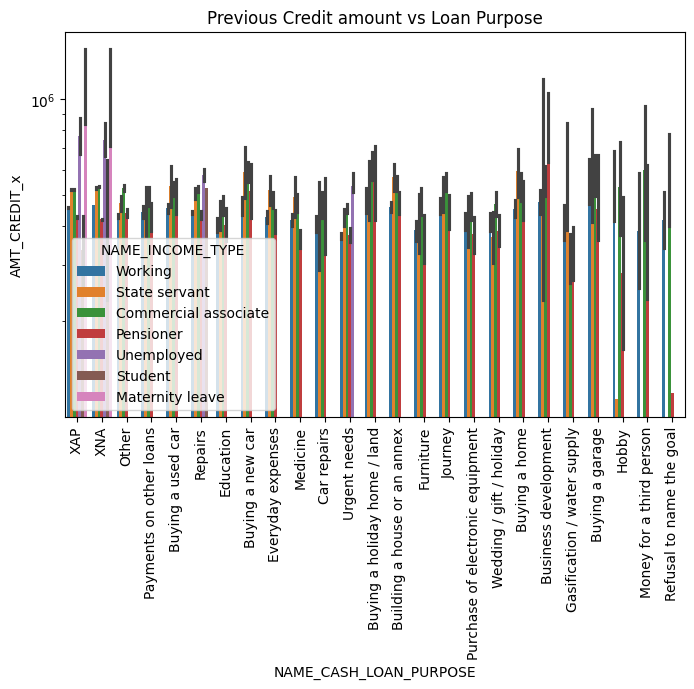

In [451]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =df_final, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_x')
plt.title('Previous Credit amount vs Loan Purpose')
plt.show()

THe credit amount of Loan purposes like 'Buying a home','Buying a new car' and 'Building a new house' is higher .
Money for third person or a Hobby is having less credits applied for.

CONCLUSION

1.Income type ‘Working’ should focus more by the Bank as they are having most number of unsuccessful payments.

2.Housing type ‘With parents’ are having least number of unsuccessful payments so if we can get as much as client then it will be good .


3.Contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ should be focussed by Bank for successful payments.

4.Unsuccessful payments on time are from loan purpose 'Repair' are highest.